###  <font color=orange>_This notebook contains all the mathematical concepts as well as the code for logistic regression from scratch without using any library!!!_ <font color=red>Bi-Class classification using gradient descent algo</font>

**Logistic regression is a discriminative algorithm(Discriminative algorithm are those algorithms for which in order to perform classification i.e., to calculate $p(class=+ve/-ve / X)$. you don't need to calculate $p(X / class=+ve/-ve)$.**

Now, we know by applying the **discriminant function** , we get
$$\frac{p(class=+ve/X)}{p(class=-ve/X)} = \log e^\frac{p(class=+ve/X)}{p(class=-ve/X)}$$

we know,
        $$\Sigma_{+ve} = \Sigma_{+ve} = \Sigma_{pooled}$$
        
**For Bi-class logistic regression,**
        $$\log e^\frac{p(class=+ve/X)}{p(class=-ve/X)} = {\theta}_0+{\theta^T}X $$
Taking exponent on both sides,
        $$\frac{p(class=+ve/X)}{p(class=-ve/X)} = e^{{\theta}_0+{\theta^T}X} $$
Flipping sides,        
        $$\frac{p(class=-ve/X)}{p(class=+ve/X)} = e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$\frac{1 - p(class=+ve/X)}{p(class=+ve/X)} = e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$\frac{1}{p(class=+ve/X)} - 1 = e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$\frac{1}{p(class=+ve/X)} = 1 + e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$p(class=+ve/X) = \frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}} $$
**This is the logistic function also known as the sigmoid/Cos function(More usage in Neural-Net's)**,       
        $$\large{f(x) = \frac{1} {1+ e^{-x}}} $$
        
**below image shows the logistic regression plot**
![logistic regression](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNKqE-xo4sa36jgIYu97-57Y_mwwg1pUv6yZ4tMBk6UmvPBV0R)


**Evaluating the expression for logistic regression by using maximum likelihood loss or minimizing the -ve log likelihood loss for bi-class classification**

**using the Maximum likelihood estimation**
- using the assumption of IID(Independent and Identically distributed), we construct the likelihood function:
    $$P(X=x_1\cap{X=x_2}\cap{X=x_3}\cap........\cap {X=x^n})$$ <----**likelihood function**

or,
         $$P({X=x_1}.{X=x_2}.{X=x_3}........{X=x^n})$$

for biclass classification,
          $$L(\theta{_0},\theta) = \Pi{^n_{i=1}} [\color{green}{P(class=1}/X^i)^C{^i}] [\color{red}{P(class=0}/X^i)^{(1-{C{^i}})}]$$
where **$C^i$= class label of $i^{th}$ training data  and $X^i$ = $i^{th}$ example or $i^{th}$ row of pandas dataframe of training data.**
         $$\color{red}{P(class=0}/X^i) = 1-\color{green}{P(class=1}/X^i) $$
or,
        $$\color{red}{P(class=0}/X^i)=1 - \frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}}$$
**Let's say that $H_i(\theta{_0},\theta)=\frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}}$ and** $1-H_i(\theta{_0},\theta)=1-\frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}}$ 

**Therefore, $\color{green}{P(class=1}=H_i(\theta{_0},\theta)$ and** $\color{red}{P(class=0}/X^i)=1-H_i(\theta{_0},\theta)$

$$L(\theta{_0},\theta) = \Pi{^n_{i=1}} [H_i(\theta{_0},\theta)^C{^i}] [1-H_i(\theta{_0},\theta))^{(1-{C{^i}})}]$$ **where $C^i=1$ if $X^i	\epsilon {\color{green} {+ve class}}$ or $C^i=0$ if $X^i	\epsilon {\color{red} {-ve class}}$** 
**applying -ve log likelihood loss,we get**
$$\large{-log_e^{L(\theta{_0},\theta)}={-1 \over N} \Sigma_{i=1}^{n}log_e^{[H_i(\theta{_0},\theta)^C{^i}] [1-H_i(\theta{_0},\theta))^{(1-{C{^i}})}]}}$$ **let's take this equation as $\large{F(x)}$ and put it as derivative in gradient descent algorithm**
Taking the partial derivative using chain rule of the above equation, we get
$${\delta \over \delta {\theta}}{(-log_e^{L(\theta{_0},\theta)})}={-1 \over N} \Sigma_{i=1}^{n}[C^i{\delta \over \delta {\theta}}(log_e^{H_i(\theta{_0},\theta)})+(1-C^i){\delta \over \delta {\theta}}(log_e^{[1-[H_i(\theta{_0},\theta)]})]$$
**after solving, the final equation for f(x) in gradient is:**
$$\large{{\delta \over \delta {\theta}}{(-log_e^{L(\theta{_0},\theta)})}={1 \over N} \Sigma_{i=1}^{n}X^i[{H_i(\theta{_0},\theta)}-C^i]}$$

In [77]:
import pandas as pd
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

In [78]:
raw_data = pd.read_csv("tumor_data.csv")

In [79]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [80]:
len(raw_data)

569

In [81]:
training_data_len = int(0.70 * len(raw_data))

In [82]:
training_data = raw_data.iloc[0:training_data_len,:]

In [83]:
testing_data = raw_data.iloc[training_data_len:,:]

In [84]:
training_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,26.50,98.87,567.7,0.20980,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,23.75,103.40,741.6,0.17910,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,40.68,97.65,711.4,0.18530,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


In [85]:
column_names = raw_data.columns

In [86]:
column_names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [87]:
training_data.drop([column_names[0],column_names[32]],axis=1,inplace=True)
testing_data.drop([column_names[0],column_names[32]],axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [90]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
training_data = pd.DataFrame(training_data)
testing_data = pd.DataFrame(testing_data)

In [94]:
training_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)
testing_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)

In [89]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
training_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)
testing_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)

In [91]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
class_labels = training_data['diagnosis']

In [19]:
class_labels 

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
368    1
369    1
370    1
371    0
372    1
373    1
374    0
375    0
376    0
377    0
378    0
379    1
380    0
381    0
382    0
383    0
384    0
385    1
386    0
387    0
388    0
389    1
390    0
391    0
392    1
393    1
394    0
395    0
396    0
397    0
Name: diagnosis, Length: 398, dtype: int64

In [20]:
C = np.array(class_labels)

In [21]:
C.shape

(398,)

In [22]:
C= C.reshape(C.shape[0],1)

In [23]:
C.shape

(398, 1)

In [24]:
pure_training_data = training_data.drop(['diagnosis'],axis=1,inplace=False)

In [98]:
pure_training_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
N = pure_training_data.shape[0]

n = pure_training_data.shape[1]

In [27]:
N

398

In [28]:
n 

30

In [29]:
X = np.array(pure_training_data)

In [30]:
X = X/np.max(X,axis=0)

In [31]:
X

array([[0.63998577, 0.26425662, 0.65145889, ..., 0.91202749, 0.69313046,
        0.57301205],
       [0.73176805, 0.45239308, 0.70503979, ..., 0.63917526, 0.41428141,
        0.42901205],
       [0.70046247, 0.54098778, 0.68965517, ..., 0.83505155, 0.54429045,
        0.42207229],
       ...,
       [0.50017787, 0.43737271, 0.47612732, ..., 0.27185567, 0.38008436,
        0.31850602],
       [0.48061188, 0.48090631, 0.46737401, ..., 0.49931271, 0.401627  ,
        0.37040964],
       [0.45535397, 0.44450102, 0.44058355, ..., 0.28508591, 0.2994878 ,
        0.33990361]])

In [32]:
X1_transpose = X[0,:]

In [33]:
X1_transpose.shape

(30,)

In [34]:
theta0_initial = np.random.randn(1,1)

In [35]:
theta0_initial

array([[-1.49763506]])

In [36]:
theta_initial = np.random.randn(X.shape[1],1)

In [37]:
theta_initial

array([[-0.31144386],
       [ 0.18240762],
       [-1.16151268],
       [-1.34420498],
       [-0.14783072],
       [ 0.17361826],
       [ 1.96410009],
       [-0.08381974],
       [ 0.22882493],
       [ 1.32244105],
       [-0.84925351],
       [-0.34771558],
       [ 0.19611127],
       [-0.10122847],
       [ 0.8087142 ],
       [ 0.98096324],
       [ 1.10989138],
       [ 0.74753573],
       [-0.42398231],
       [ 1.08518485],
       [ 1.13802641],
       [-1.42090812],
       [ 0.61908884],
       [ 0.0547509 ],
       [-0.32670862],
       [ 0.58949383],
       [-0.03467752],
       [-0.88062465],
       [-0.77405171],
       [-0.19475744]])

In [38]:
epsilon = 0.0001
alpha = 0.01

In [39]:
power = (theta0_initial + np.matmul(X,theta_initial))

In [40]:
power

array([[-0.16827134],
       [-2.02126026],
       [-1.34155567],
       [-0.15359606],
       [-0.87943997],
       [-0.82052044],
       [-1.95117325],
       [-1.1863378 ],
       [-1.09309883],
       [-0.26472173],
       [-2.26926239],
       [-1.42234377],
       [-0.22468719],
       [-1.37203576],
       [-0.39900213],
       [-1.13457452],
       [-2.01947865],
       [-1.30637904],
       [-1.88212432],
       [-1.515492  ],
       [-1.40191246],
       [-1.06019546],
       [-0.51359464],
       [-2.34016531],
       [-1.54277713],
       [-0.65947789],
       [-1.56741938],
       [-1.40185159],
       [-1.41040135],
       [-1.3803146 ],
       [-1.25234799],
       [-0.96183485],
       [-1.11502651],
       [-1.35287728],
       [-1.44763714],
       [-1.87952367],
       [-1.33291356],
       [-1.86929665],
       [-1.84983613],
       [-1.4937529 ],
       [-2.08756323],
       [-1.59539141],
       [-0.61460005],
       [-1.45727346],
       [-1.86087981],
       [-1

In [41]:
H_theta0_theta = 1/(1+ np.exp(-power))

In [42]:
H_theta0_theta

array([[0.45803115],
       [0.11698874],
       [0.20725435],
       [0.4616763 ],
       [0.29329384],
       [0.3056532 ],
       [0.12442548],
       [0.23391456],
       [0.2510352 ],
       [0.43420336],
       [0.09370083],
       [0.19429442],
       [0.44406333],
       [0.20229114],
       [0.40155211],
       [0.24331788],
       [0.11717291],
       [0.21309339],
       [0.13214506],
       [0.18012631],
       [0.19751281],
       [0.2572721 ],
       [0.37435124],
       [0.08785067],
       [0.17613192],
       [0.34085691],
       [0.17258459],
       [0.19752246],
       [0.19617076],
       [0.20095848],
       [0.22229395],
       [0.27651098],
       [0.24693498],
       [0.20540037],
       [0.19036548],
       [0.1324436 ],
       [0.20867784],
       [0.13362313],
       [0.13589214],
       [0.18335911],
       [0.1103115 ],
       [0.16862672],
       [0.35101058],
       [0.1888847 ],
       [0.13460054],
       [0.24047534],
       [0.20288126],
       [0.176

In [43]:
temp = (H_theta0_theta - C)

In [44]:
temp 

array([[-0.54196885],
       [-0.88301126],
       [-0.79274565],
       [-0.5383237 ],
       [-0.70670616],
       [-0.6943468 ],
       [-0.87557452],
       [-0.76608544],
       [-0.7489648 ],
       [-0.56579664],
       [-0.90629917],
       [-0.80570558],
       [-0.55593667],
       [-0.79770886],
       [-0.59844789],
       [-0.75668212],
       [-0.88282709],
       [-0.78690661],
       [-0.86785494],
       [ 0.18012631],
       [ 0.19751281],
       [ 0.2572721 ],
       [-0.62564876],
       [-0.91214933],
       [-0.82386808],
       [-0.65914309],
       [-0.82741541],
       [-0.80247754],
       [-0.80382924],
       [-0.79904152],
       [-0.77770605],
       [-0.72348902],
       [-0.75306502],
       [-0.79459963],
       [-0.80963452],
       [-0.8675564 ],
       [-0.79132216],
       [ 0.13362313],
       [-0.86410786],
       [-0.81664089],
       [-0.8896885 ],
       [-0.83137328],
       [-0.64898942],
       [-0.8111153 ],
       [-0.86539946],
       [-0

In [45]:
temp.shape

(398, 1)

In [46]:
dels = np.matmul((X.T),temp)

In [47]:
dels

array([[-62.97439807],
       [-52.75387738],
       [-62.28774115],
       [-43.60353919],
       [-63.93903325],
       [-41.40885729],
       [-39.58235364],
       [-49.74885063],
       [-56.72092791],
       [-53.22946995],
       [-22.58628136],
       [-20.48464464],
       [-20.88121231],
       [-15.82323462],
       [-15.98812286],
       [-18.58208537],
       [ -7.35109889],
       [-24.9804237 ],
       [-20.77545027],
       [ -8.27266017],
       [-67.08740081],
       [-58.55559475],
       [-64.92995991],
       [-48.3357099 ],
       [-60.79317659],
       [-37.01060155],
       [-37.85135764],
       [-69.93458231],
       [-46.76816477],
       [-39.23753213]])

In [48]:
dels.shape

(30, 1)

In [49]:
i = 0
alpha = 0.1
epsilon = 0.000001

neg_log_like_loss = []
iterations = []


while (True):
    
    power_initial = theta0_initial + np.matmul(X,theta_initial)
    H_theta0_theta_initial = 1/(1 + np.exp(-power_initial))
    temp = (H_theta0_theta_initial - C)
    dels = np.matmul(X.T,temp)/N
    
    #The code above is calculating the matix of derivatives wrt all thetas except theta0
    
    neg_log_like_initial = -(np.matmul(C.T,np.log(H_theta0_theta_initial)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_initial))))/N
    
    #The statement above is computing the value of Negative Log Likelhood function at initial values of Thetas
    
    theta0_final = theta0_initial - (alpha*(np.sum(temp))/N)
    theta_final = theta_initial - alpha*dels
    
    
    #The code above is updating the values of Thetas using Gradient Descent
    
    
    power_final = theta0_final + np.matmul(X,theta_final)
    H_theta0_theta_final = 1/(1 + np.exp(-power_final))
    neg_log_like_final = -(np.matmul(C.T,np.log(H_theta0_theta_final)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_final))))/N 
    
    #The code above is recomputing the value of Negative Log Likelihood Function at updated values of Thetas
    
    if abs(neg_log_like_initial - neg_log_like_final) < epsilon:
        
        break 
    
    
    theta0_initial = theta0_final
    theta_initial = theta_final
    
    i += 1
    
    iterations.append(i)
    neg_log_like_loss.append(neg_log_like_initial)
    
    print("The value of Negative Log Likelihood Function in iteration # {} is {}".format(i, neg_log_like_initial))

The value of Negative Log Likelihood Function in iteration # 1 is [[0.86391203]]
The value of Negative Log Likelihood Function in iteration # 2 is [[0.82229541]]
The value of Negative Log Likelihood Function in iteration # 3 is [[0.78778032]]
The value of Negative Log Likelihood Function in iteration # 4 is [[0.75945449]]
The value of Negative Log Likelihood Function in iteration # 5 is [[0.73638842]]
The value of Negative Log Likelihood Function in iteration # 6 is [[0.71769796]]
The value of Negative Log Likelihood Function in iteration # 7 is [[0.70258425]]
The value of Negative Log Likelihood Function in iteration # 8 is [[0.69035316]]
The value of Negative Log Likelihood Function in iteration # 9 is [[0.68041945]]
The value of Negative Log Likelihood Function in iteration # 10 is [[0.6723009]]
The value of Negative Log Likelihood Function in iteration # 11 is [[0.66560714]]
The value of Negative Log Likelihood Function in iteration # 12 is [[0.66002642]]
The value of Negative Log 

The value of Negative Log Likelihood Function in iteration # 195 is [[0.44480186]]
The value of Negative Log Likelihood Function in iteration # 196 is [[0.44414796]]
The value of Negative Log Likelihood Function in iteration # 197 is [[0.44349697]]
The value of Negative Log Likelihood Function in iteration # 198 is [[0.44284888]]
The value of Negative Log Likelihood Function in iteration # 199 is [[0.44220367]]
The value of Negative Log Likelihood Function in iteration # 200 is [[0.44156132]]
The value of Negative Log Likelihood Function in iteration # 201 is [[0.4409218]]
The value of Negative Log Likelihood Function in iteration # 202 is [[0.44028511]]
The value of Negative Log Likelihood Function in iteration # 203 is [[0.43965121]]
The value of Negative Log Likelihood Function in iteration # 204 is [[0.4390201]]
The value of Negative Log Likelihood Function in iteration # 205 is [[0.43839175]]
The value of Negative Log Likelihood Function in iteration # 206 is [[0.43776614]]
The va

The value of Negative Log Likelihood Function in iteration # 378 is [[0.35948137]]
The value of Negative Log Likelihood Function in iteration # 379 is [[0.35914859]]
The value of Negative Log Likelihood Function in iteration # 380 is [[0.35881683]]
The value of Negative Log Likelihood Function in iteration # 381 is [[0.35848608]]
The value of Negative Log Likelihood Function in iteration # 382 is [[0.35815633]]
The value of Negative Log Likelihood Function in iteration # 383 is [[0.35782759]]
The value of Negative Log Likelihood Function in iteration # 384 is [[0.35749984]]
The value of Negative Log Likelihood Function in iteration # 385 is [[0.35717308]]
The value of Negative Log Likelihood Function in iteration # 386 is [[0.35684731]]
The value of Negative Log Likelihood Function in iteration # 387 is [[0.35652252]]
The value of Negative Log Likelihood Function in iteration # 388 is [[0.35619871]]
The value of Negative Log Likelihood Function in iteration # 389 is [[0.35587587]]
The 

The value of Negative Log Likelihood Function in iteration # 570 is [[0.30983505]]
The value of Negative Log Likelihood Function in iteration # 571 is [[0.30963371]]
The value of Negative Log Likelihood Function in iteration # 572 is [[0.30943282]]
The value of Negative Log Likelihood Function in iteration # 573 is [[0.30923238]]
The value of Negative Log Likelihood Function in iteration # 574 is [[0.30903239]]
The value of Negative Log Likelihood Function in iteration # 575 is [[0.30883284]]
The value of Negative Log Likelihood Function in iteration # 576 is [[0.30863374]]
The value of Negative Log Likelihood Function in iteration # 577 is [[0.30843509]]
The value of Negative Log Likelihood Function in iteration # 578 is [[0.30823688]]
The value of Negative Log Likelihood Function in iteration # 579 is [[0.3080391]]
The value of Negative Log Likelihood Function in iteration # 580 is [[0.30784177]]
The value of Negative Log Likelihood Function in iteration # 581 is [[0.30764487]]
The v

The value of Negative Log Likelihood Function in iteration # 793 is [[0.27375145]]
The value of Negative Log Likelihood Function in iteration # 794 is [[0.27362106]]
The value of Negative Log Likelihood Function in iteration # 795 is [[0.27349089]]
The value of Negative Log Likelihood Function in iteration # 796 is [[0.27336093]]
The value of Negative Log Likelihood Function in iteration # 797 is [[0.2732312]]
The value of Negative Log Likelihood Function in iteration # 798 is [[0.27310169]]
The value of Negative Log Likelihood Function in iteration # 799 is [[0.27297239]]
The value of Negative Log Likelihood Function in iteration # 800 is [[0.27284331]]
The value of Negative Log Likelihood Function in iteration # 801 is [[0.27271445]]
The value of Negative Log Likelihood Function in iteration # 802 is [[0.27258581]]
The value of Negative Log Likelihood Function in iteration # 803 is [[0.27245738]]
The value of Negative Log Likelihood Function in iteration # 804 is [[0.27232917]]
The v

The value of Negative Log Likelihood Function in iteration # 945 is [[0.25615541]]
The value of Negative Log Likelihood Function in iteration # 946 is [[0.25605264]]
The value of Negative Log Likelihood Function in iteration # 947 is [[0.25595002]]
The value of Negative Log Likelihood Function in iteration # 948 is [[0.25584755]]
The value of Negative Log Likelihood Function in iteration # 949 is [[0.25574522]]
The value of Negative Log Likelihood Function in iteration # 950 is [[0.25564304]]
The value of Negative Log Likelihood Function in iteration # 951 is [[0.25554101]]
The value of Negative Log Likelihood Function in iteration # 952 is [[0.25543913]]
The value of Negative Log Likelihood Function in iteration # 953 is [[0.25533739]]
The value of Negative Log Likelihood Function in iteration # 954 is [[0.25523581]]
The value of Negative Log Likelihood Function in iteration # 955 is [[0.25513436]]
The value of Negative Log Likelihood Function in iteration # 956 is [[0.25503306]]
The 

The value of Negative Log Likelihood Function in iteration # 1055 is [[0.24567176]]
The value of Negative Log Likelihood Function in iteration # 1056 is [[0.24558345]]
The value of Negative Log Likelihood Function in iteration # 1057 is [[0.24549525]]
The value of Negative Log Likelihood Function in iteration # 1058 is [[0.24540716]]
The value of Negative Log Likelihood Function in iteration # 1059 is [[0.24531919]]
The value of Negative Log Likelihood Function in iteration # 1060 is [[0.24523134]]
The value of Negative Log Likelihood Function in iteration # 1061 is [[0.2451436]]
The value of Negative Log Likelihood Function in iteration # 1062 is [[0.24505598]]
The value of Negative Log Likelihood Function in iteration # 1063 is [[0.24496846]]
The value of Negative Log Likelihood Function in iteration # 1064 is [[0.24488107]]
The value of Negative Log Likelihood Function in iteration # 1065 is [[0.24479378]]
The value of Negative Log Likelihood Function in iteration # 1066 is [[0.2447

The value of Negative Log Likelihood Function in iteration # 1267 is [[0.22919826]]
The value of Negative Log Likelihood Function in iteration # 1268 is [[0.22912987]]
The value of Negative Log Likelihood Function in iteration # 1269 is [[0.22906155]]
The value of Negative Log Likelihood Function in iteration # 1270 is [[0.2289933]]
The value of Negative Log Likelihood Function in iteration # 1271 is [[0.22892514]]
The value of Negative Log Likelihood Function in iteration # 1272 is [[0.22885704]]
The value of Negative Log Likelihood Function in iteration # 1273 is [[0.22878902]]
The value of Negative Log Likelihood Function in iteration # 1274 is [[0.22872108]]
The value of Negative Log Likelihood Function in iteration # 1275 is [[0.22865321]]
The value of Negative Log Likelihood Function in iteration # 1276 is [[0.22858542]]
The value of Negative Log Likelihood Function in iteration # 1277 is [[0.2285177]]
The value of Negative Log Likelihood Function in iteration # 1278 is [[0.22845

The value of Negative Log Likelihood Function in iteration # 1409 is [[0.22018727]]
The value of Negative Log Likelihood Function in iteration # 1410 is [[0.22012842]]
The value of Negative Log Likelihood Function in iteration # 1411 is [[0.22006964]]
The value of Negative Log Likelihood Function in iteration # 1412 is [[0.22001092]]
The value of Negative Log Likelihood Function in iteration # 1413 is [[0.21995225]]
The value of Negative Log Likelihood Function in iteration # 1414 is [[0.21989365]]
The value of Negative Log Likelihood Function in iteration # 1415 is [[0.2198351]]
The value of Negative Log Likelihood Function in iteration # 1416 is [[0.21977661]]
The value of Negative Log Likelihood Function in iteration # 1417 is [[0.21971818]]
The value of Negative Log Likelihood Function in iteration # 1418 is [[0.21965981]]
The value of Negative Log Likelihood Function in iteration # 1419 is [[0.2196015]]
The value of Negative Log Likelihood Function in iteration # 1420 is [[0.21954

The value of Negative Log Likelihood Function in iteration # 1562 is [[0.21182276]]
The value of Negative Log Likelihood Function in iteration # 1563 is [[0.21177199]]
The value of Negative Log Likelihood Function in iteration # 1564 is [[0.21172127]]
The value of Negative Log Likelihood Function in iteration # 1565 is [[0.2116706]]
The value of Negative Log Likelihood Function in iteration # 1566 is [[0.21161997]]
The value of Negative Log Likelihood Function in iteration # 1567 is [[0.21156939]]
The value of Negative Log Likelihood Function in iteration # 1568 is [[0.21151886]]
The value of Negative Log Likelihood Function in iteration # 1569 is [[0.21146837]]
The value of Negative Log Likelihood Function in iteration # 1570 is [[0.21141793]]
The value of Negative Log Likelihood Function in iteration # 1571 is [[0.21136754]]
The value of Negative Log Likelihood Function in iteration # 1572 is [[0.21131719]]
The value of Negative Log Likelihood Function in iteration # 1573 is [[0.2112

The value of Negative Log Likelihood Function in iteration # 1796 is [[0.20108653]]
The value of Negative Log Likelihood Function in iteration # 1797 is [[0.20104507]]
The value of Negative Log Likelihood Function in iteration # 1798 is [[0.20100364]]
The value of Negative Log Likelihood Function in iteration # 1799 is [[0.20096224]]
The value of Negative Log Likelihood Function in iteration # 1800 is [[0.20092088]]
The value of Negative Log Likelihood Function in iteration # 1801 is [[0.20087955]]
The value of Negative Log Likelihood Function in iteration # 1802 is [[0.20083825]]
The value of Negative Log Likelihood Function in iteration # 1803 is [[0.20079699]]
The value of Negative Log Likelihood Function in iteration # 1804 is [[0.20075576]]
The value of Negative Log Likelihood Function in iteration # 1805 is [[0.20071456]]
The value of Negative Log Likelihood Function in iteration # 1806 is [[0.2006734]]
The value of Negative Log Likelihood Function in iteration # 1807 is [[0.2006

The value of Negative Log Likelihood Function in iteration # 2025 is [[0.19239036]]
The value of Negative Log Likelihood Function in iteration # 2026 is [[0.19235558]]
The value of Negative Log Likelihood Function in iteration # 2027 is [[0.19232083]]
The value of Negative Log Likelihood Function in iteration # 2028 is [[0.19228611]]
The value of Negative Log Likelihood Function in iteration # 2029 is [[0.19225141]]
The value of Negative Log Likelihood Function in iteration # 2030 is [[0.19221673]]
The value of Negative Log Likelihood Function in iteration # 2031 is [[0.19218208]]
The value of Negative Log Likelihood Function in iteration # 2032 is [[0.19214746]]
The value of Negative Log Likelihood Function in iteration # 2033 is [[0.19211286]]
The value of Negative Log Likelihood Function in iteration # 2034 is [[0.19207828]]
The value of Negative Log Likelihood Function in iteration # 2035 is [[0.19204373]]
The value of Negative Log Likelihood Function in iteration # 2036 is [[0.192

The value of Negative Log Likelihood Function in iteration # 2205 is [[0.18651071]]
The value of Negative Log Likelihood Function in iteration # 2206 is [[0.18648004]]
The value of Negative Log Likelihood Function in iteration # 2207 is [[0.18644939]]
The value of Negative Log Likelihood Function in iteration # 2208 is [[0.18641876]]
The value of Negative Log Likelihood Function in iteration # 2209 is [[0.18638814]]
The value of Negative Log Likelihood Function in iteration # 2210 is [[0.18635755]]
The value of Negative Log Likelihood Function in iteration # 2211 is [[0.18632698]]
The value of Negative Log Likelihood Function in iteration # 2212 is [[0.18629643]]
The value of Negative Log Likelihood Function in iteration # 2213 is [[0.1862659]]
The value of Negative Log Likelihood Function in iteration # 2214 is [[0.18623539]]
The value of Negative Log Likelihood Function in iteration # 2215 is [[0.1862049]]
The value of Negative Log Likelihood Function in iteration # 2216 is [[0.18617

The value of Negative Log Likelihood Function in iteration # 2432 is [[0.18003391]]
The value of Negative Log Likelihood Function in iteration # 2433 is [[0.18000737]]
The value of Negative Log Likelihood Function in iteration # 2434 is [[0.17998084]]
The value of Negative Log Likelihood Function in iteration # 2435 is [[0.17995433]]
The value of Negative Log Likelihood Function in iteration # 2436 is [[0.17992784]]
The value of Negative Log Likelihood Function in iteration # 2437 is [[0.17990137]]
The value of Negative Log Likelihood Function in iteration # 2438 is [[0.17987491]]
The value of Negative Log Likelihood Function in iteration # 2439 is [[0.17984846]]
The value of Negative Log Likelihood Function in iteration # 2440 is [[0.17982204]]
The value of Negative Log Likelihood Function in iteration # 2441 is [[0.17979562]]
The value of Negative Log Likelihood Function in iteration # 2442 is [[0.17976923]]
The value of Negative Log Likelihood Function in iteration # 2443 is [[0.179

The value of Negative Log Likelihood Function in iteration # 2630 is [[0.17507346]]
The value of Negative Log Likelihood Function in iteration # 2631 is [[0.17504981]]
The value of Negative Log Likelihood Function in iteration # 2632 is [[0.17502618]]
The value of Negative Log Likelihood Function in iteration # 2633 is [[0.17500256]]
The value of Negative Log Likelihood Function in iteration # 2634 is [[0.17497896]]
The value of Negative Log Likelihood Function in iteration # 2635 is [[0.17495536]]
The value of Negative Log Likelihood Function in iteration # 2636 is [[0.17493178]]
The value of Negative Log Likelihood Function in iteration # 2637 is [[0.17490822]]
The value of Negative Log Likelihood Function in iteration # 2638 is [[0.17488467]]
The value of Negative Log Likelihood Function in iteration # 2639 is [[0.17486113]]
The value of Negative Log Likelihood Function in iteration # 2640 is [[0.1748376]]
The value of Negative Log Likelihood Function in iteration # 2641 is [[0.1748

The value of Negative Log Likelihood Function in iteration # 2823 is [[0.17074129]]
The value of Negative Log Likelihood Function in iteration # 2824 is [[0.17071999]]
The value of Negative Log Likelihood Function in iteration # 2825 is [[0.1706987]]
The value of Negative Log Likelihood Function in iteration # 2826 is [[0.17067741]]
The value of Negative Log Likelihood Function in iteration # 2827 is [[0.17065614]]
The value of Negative Log Likelihood Function in iteration # 2828 is [[0.17063488]]
The value of Negative Log Likelihood Function in iteration # 2829 is [[0.17061363]]
The value of Negative Log Likelihood Function in iteration # 2830 is [[0.17059239]]
The value of Negative Log Likelihood Function in iteration # 2831 is [[0.17057116]]
The value of Negative Log Likelihood Function in iteration # 2832 is [[0.17054995]]
The value of Negative Log Likelihood Function in iteration # 2833 is [[0.17052874]]
The value of Negative Log Likelihood Function in iteration # 2834 is [[0.1705

The value of Negative Log Likelihood Function in iteration # 3064 is [[0.16590602]]
The value of Negative Log Likelihood Function in iteration # 3065 is [[0.16588712]]
The value of Negative Log Likelihood Function in iteration # 3066 is [[0.16586824]]
The value of Negative Log Likelihood Function in iteration # 3067 is [[0.16584936]]
The value of Negative Log Likelihood Function in iteration # 3068 is [[0.16583049]]
The value of Negative Log Likelihood Function in iteration # 3069 is [[0.16581163]]
The value of Negative Log Likelihood Function in iteration # 3070 is [[0.16579278]]
The value of Negative Log Likelihood Function in iteration # 3071 is [[0.16577394]]
The value of Negative Log Likelihood Function in iteration # 3072 is [[0.16575511]]
The value of Negative Log Likelihood Function in iteration # 3073 is [[0.16573629]]
The value of Negative Log Likelihood Function in iteration # 3074 is [[0.16571747]]
The value of Negative Log Likelihood Function in iteration # 3075 is [[0.165

The value of Negative Log Likelihood Function in iteration # 3334 is [[0.16110916]]
The value of Negative Log Likelihood Function in iteration # 3335 is [[0.16109246]]
The value of Negative Log Likelihood Function in iteration # 3336 is [[0.16107576]]
The value of Negative Log Likelihood Function in iteration # 3337 is [[0.16105906]]
The value of Negative Log Likelihood Function in iteration # 3338 is [[0.16104238]]
The value of Negative Log Likelihood Function in iteration # 3339 is [[0.1610257]]
The value of Negative Log Likelihood Function in iteration # 3340 is [[0.16100903]]
The value of Negative Log Likelihood Function in iteration # 3341 is [[0.16099237]]
The value of Negative Log Likelihood Function in iteration # 3342 is [[0.16097571]]
The value of Negative Log Likelihood Function in iteration # 3343 is [[0.16095906]]
The value of Negative Log Likelihood Function in iteration # 3344 is [[0.16094242]]
The value of Negative Log Likelihood Function in iteration # 3345 is [[0.1609

The value of Negative Log Likelihood Function in iteration # 3458 is [[0.15909131]]
The value of Negative Log Likelihood Function in iteration # 3459 is [[0.15907546]]
The value of Negative Log Likelihood Function in iteration # 3460 is [[0.15905962]]
The value of Negative Log Likelihood Function in iteration # 3461 is [[0.15904379]]
The value of Negative Log Likelihood Function in iteration # 3462 is [[0.15902797]]
The value of Negative Log Likelihood Function in iteration # 3463 is [[0.15901215]]
The value of Negative Log Likelihood Function in iteration # 3464 is [[0.15899634]]
The value of Negative Log Likelihood Function in iteration # 3465 is [[0.15898053]]
The value of Negative Log Likelihood Function in iteration # 3466 is [[0.15896473]]
The value of Negative Log Likelihood Function in iteration # 3467 is [[0.15894894]]
The value of Negative Log Likelihood Function in iteration # 3468 is [[0.15893315]]
The value of Negative Log Likelihood Function in iteration # 3469 is [[0.158

The value of Negative Log Likelihood Function in iteration # 3575 is [[0.15728122]]
The value of Negative Log Likelihood Function in iteration # 3576 is [[0.15726611]]
The value of Negative Log Likelihood Function in iteration # 3577 is [[0.15725102]]
The value of Negative Log Likelihood Function in iteration # 3578 is [[0.15723593]]
The value of Negative Log Likelihood Function in iteration # 3579 is [[0.15722085]]
The value of Negative Log Likelihood Function in iteration # 3580 is [[0.15720577]]
The value of Negative Log Likelihood Function in iteration # 3581 is [[0.1571907]]
The value of Negative Log Likelihood Function in iteration # 3582 is [[0.15717564]]
The value of Negative Log Likelihood Function in iteration # 3583 is [[0.15716058]]
The value of Negative Log Likelihood Function in iteration # 3584 is [[0.15714553]]
The value of Negative Log Likelihood Function in iteration # 3585 is [[0.15713048]]
The value of Negative Log Likelihood Function in iteration # 3586 is [[0.1571

The value of Negative Log Likelihood Function in iteration # 3734 is [[0.15495412]]
The value of Negative Log Likelihood Function in iteration # 3735 is [[0.15493994]]
The value of Negative Log Likelihood Function in iteration # 3736 is [[0.15492576]]
The value of Negative Log Likelihood Function in iteration # 3737 is [[0.15491159]]
The value of Negative Log Likelihood Function in iteration # 3738 is [[0.15489743]]
The value of Negative Log Likelihood Function in iteration # 3739 is [[0.15488327]]
The value of Negative Log Likelihood Function in iteration # 3740 is [[0.15486911]]
The value of Negative Log Likelihood Function in iteration # 3741 is [[0.15485496]]
The value of Negative Log Likelihood Function in iteration # 3742 is [[0.15484082]]
The value of Negative Log Likelihood Function in iteration # 3743 is [[0.15482668]]
The value of Negative Log Likelihood Function in iteration # 3744 is [[0.15481255]]
The value of Negative Log Likelihood Function in iteration # 3745 is [[0.154

The value of Negative Log Likelihood Function in iteration # 3841 is [[0.15346694]]
The value of Negative Log Likelihood Function in iteration # 3842 is [[0.15345332]]
The value of Negative Log Likelihood Function in iteration # 3843 is [[0.15343971]]
The value of Negative Log Likelihood Function in iteration # 3844 is [[0.1534261]]
The value of Negative Log Likelihood Function in iteration # 3845 is [[0.1534125]]
The value of Negative Log Likelihood Function in iteration # 3846 is [[0.1533989]]
The value of Negative Log Likelihood Function in iteration # 3847 is [[0.15338531]]
The value of Negative Log Likelihood Function in iteration # 3848 is [[0.15337172]]
The value of Negative Log Likelihood Function in iteration # 3849 is [[0.15335814]]
The value of Negative Log Likelihood Function in iteration # 3850 is [[0.15334456]]
The value of Negative Log Likelihood Function in iteration # 3851 is [[0.15333099]]
The value of Negative Log Likelihood Function in iteration # 3852 is [[0.153317

The value of Negative Log Likelihood Function in iteration # 3983 is [[0.15158275]]
The value of Negative Log Likelihood Function in iteration # 3984 is [[0.15156983]]
The value of Negative Log Likelihood Function in iteration # 3985 is [[0.15155691]]
The value of Negative Log Likelihood Function in iteration # 3986 is [[0.15154399]]
The value of Negative Log Likelihood Function in iteration # 3987 is [[0.15153108]]
The value of Negative Log Likelihood Function in iteration # 3988 is [[0.15151817]]
The value of Negative Log Likelihood Function in iteration # 3989 is [[0.15150527]]
The value of Negative Log Likelihood Function in iteration # 3990 is [[0.15149237]]
The value of Negative Log Likelihood Function in iteration # 3991 is [[0.15147948]]
The value of Negative Log Likelihood Function in iteration # 3992 is [[0.15146659]]
The value of Negative Log Likelihood Function in iteration # 3993 is [[0.1514537]]
The value of Negative Log Likelihood Function in iteration # 3994 is [[0.1514

The value of Negative Log Likelihood Function in iteration # 4147 is [[0.14952297]]
The value of Negative Log Likelihood Function in iteration # 4148 is [[0.14951077]]
The value of Negative Log Likelihood Function in iteration # 4149 is [[0.14949857]]
The value of Negative Log Likelihood Function in iteration # 4150 is [[0.14948638]]
The value of Negative Log Likelihood Function in iteration # 4151 is [[0.14947419]]
The value of Negative Log Likelihood Function in iteration # 4152 is [[0.14946201]]
The value of Negative Log Likelihood Function in iteration # 4153 is [[0.14944983]]
The value of Negative Log Likelihood Function in iteration # 4154 is [[0.14943765]]
The value of Negative Log Likelihood Function in iteration # 4155 is [[0.14942548]]
The value of Negative Log Likelihood Function in iteration # 4156 is [[0.14941332]]
The value of Negative Log Likelihood Function in iteration # 4157 is [[0.14940115]]
The value of Negative Log Likelihood Function in iteration # 4158 is [[0.149

The value of Negative Log Likelihood Function in iteration # 4276 is [[0.14798289]]
The value of Negative Log Likelihood Function in iteration # 4277 is [[0.14797121]]
The value of Negative Log Likelihood Function in iteration # 4278 is [[0.14795954]]
The value of Negative Log Likelihood Function in iteration # 4279 is [[0.14794786]]
The value of Negative Log Likelihood Function in iteration # 4280 is [[0.1479362]]
The value of Negative Log Likelihood Function in iteration # 4281 is [[0.14792453]]
The value of Negative Log Likelihood Function in iteration # 4282 is [[0.14791287]]
The value of Negative Log Likelihood Function in iteration # 4283 is [[0.14790122]]
The value of Negative Log Likelihood Function in iteration # 4284 is [[0.14788957]]
The value of Negative Log Likelihood Function in iteration # 4285 is [[0.14787792]]
The value of Negative Log Likelihood Function in iteration # 4286 is [[0.14786627]]
The value of Negative Log Likelihood Function in iteration # 4287 is [[0.1478

The value of Negative Log Likelihood Function in iteration # 4406 is [[0.14649649]]
The value of Negative Log Likelihood Function in iteration # 4407 is [[0.1464853]]
The value of Negative Log Likelihood Function in iteration # 4408 is [[0.14647411]]
The value of Negative Log Likelihood Function in iteration # 4409 is [[0.14646293]]
The value of Negative Log Likelihood Function in iteration # 4410 is [[0.14645175]]
The value of Negative Log Likelihood Function in iteration # 4411 is [[0.14644057]]
The value of Negative Log Likelihood Function in iteration # 4412 is [[0.1464294]]
The value of Negative Log Likelihood Function in iteration # 4413 is [[0.14641823]]
The value of Negative Log Likelihood Function in iteration # 4414 is [[0.14640706]]
The value of Negative Log Likelihood Function in iteration # 4415 is [[0.1463959]]
The value of Negative Log Likelihood Function in iteration # 4416 is [[0.14638474]]
The value of Negative Log Likelihood Function in iteration # 4417 is [[0.146373

The value of Negative Log Likelihood Function in iteration # 4513 is [[0.14531914]]
The value of Negative Log Likelihood Function in iteration # 4514 is [[0.14530833]]
The value of Negative Log Likelihood Function in iteration # 4515 is [[0.14529752]]
The value of Negative Log Likelihood Function in iteration # 4516 is [[0.14528671]]
The value of Negative Log Likelihood Function in iteration # 4517 is [[0.1452759]]
The value of Negative Log Likelihood Function in iteration # 4518 is [[0.1452651]]
The value of Negative Log Likelihood Function in iteration # 4519 is [[0.1452543]]
The value of Negative Log Likelihood Function in iteration # 4520 is [[0.14524351]]
The value of Negative Log Likelihood Function in iteration # 4521 is [[0.14523271]]
The value of Negative Log Likelihood Function in iteration # 4522 is [[0.14522193]]
The value of Negative Log Likelihood Function in iteration # 4523 is [[0.14521114]]
The value of Negative Log Likelihood Function in iteration # 4524 is [[0.145200

The value of Negative Log Likelihood Function in iteration # 4654 is [[0.14382693]]
The value of Negative Log Likelihood Function in iteration # 4655 is [[0.14381658]]
The value of Negative Log Likelihood Function in iteration # 4656 is [[0.14380623]]
The value of Negative Log Likelihood Function in iteration # 4657 is [[0.14379588]]
The value of Negative Log Likelihood Function in iteration # 4658 is [[0.14378553]]
The value of Negative Log Likelihood Function in iteration # 4659 is [[0.14377519]]
The value of Negative Log Likelihood Function in iteration # 4660 is [[0.14376486]]
The value of Negative Log Likelihood Function in iteration # 4661 is [[0.14375452]]
The value of Negative Log Likelihood Function in iteration # 4662 is [[0.14374419]]
The value of Negative Log Likelihood Function in iteration # 4663 is [[0.14373386]]
The value of Negative Log Likelihood Function in iteration # 4664 is [[0.14372354]]
The value of Negative Log Likelihood Function in iteration # 4665 is [[0.143

The value of Negative Log Likelihood Function in iteration # 4834 is [[0.14201265]]
The value of Negative Log Likelihood Function in iteration # 4835 is [[0.14200284]]
The value of Negative Log Likelihood Function in iteration # 4836 is [[0.14199303]]
The value of Negative Log Likelihood Function in iteration # 4837 is [[0.14198322]]
The value of Negative Log Likelihood Function in iteration # 4838 is [[0.14197342]]
The value of Negative Log Likelihood Function in iteration # 4839 is [[0.14196362]]
The value of Negative Log Likelihood Function in iteration # 4840 is [[0.14195382]]
The value of Negative Log Likelihood Function in iteration # 4841 is [[0.14194403]]
The value of Negative Log Likelihood Function in iteration # 4842 is [[0.14193424]]
The value of Negative Log Likelihood Function in iteration # 4843 is [[0.14192445]]
The value of Negative Log Likelihood Function in iteration # 4844 is [[0.14191467]]
The value of Negative Log Likelihood Function in iteration # 4845 is [[0.141

The value of Negative Log Likelihood Function in iteration # 4968 is [[0.14072303]]
The value of Negative Log Likelihood Function in iteration # 4969 is [[0.14071359]]
The value of Negative Log Likelihood Function in iteration # 4970 is [[0.14070416]]
The value of Negative Log Likelihood Function in iteration # 4971 is [[0.14069472]]
The value of Negative Log Likelihood Function in iteration # 4972 is [[0.14068529]]
The value of Negative Log Likelihood Function in iteration # 4973 is [[0.14067587]]
The value of Negative Log Likelihood Function in iteration # 4974 is [[0.14066644]]
The value of Negative Log Likelihood Function in iteration # 4975 is [[0.14065702]]
The value of Negative Log Likelihood Function in iteration # 4976 is [[0.1406476]]
The value of Negative Log Likelihood Function in iteration # 4977 is [[0.14063818]]
The value of Negative Log Likelihood Function in iteration # 4978 is [[0.14062877]]
The value of Negative Log Likelihood Function in iteration # 4979 is [[0.1406

The value of Negative Log Likelihood Function in iteration # 5151 is [[0.13903925]]
The value of Negative Log Likelihood Function in iteration # 5152 is [[0.13903028]]
The value of Negative Log Likelihood Function in iteration # 5153 is [[0.13902132]]
The value of Negative Log Likelihood Function in iteration # 5154 is [[0.13901235]]
The value of Negative Log Likelihood Function in iteration # 5155 is [[0.13900339]]
The value of Negative Log Likelihood Function in iteration # 5156 is [[0.13899443]]
The value of Negative Log Likelihood Function in iteration # 5157 is [[0.13898548]]
The value of Negative Log Likelihood Function in iteration # 5158 is [[0.13897653]]
The value of Negative Log Likelihood Function in iteration # 5159 is [[0.13896757]]
The value of Negative Log Likelihood Function in iteration # 5160 is [[0.13895863]]
The value of Negative Log Likelihood Function in iteration # 5161 is [[0.13894968]]
The value of Negative Log Likelihood Function in iteration # 5162 is [[0.138

The value of Negative Log Likelihood Function in iteration # 5281 is [[0.13789363]]
The value of Negative Log Likelihood Function in iteration # 5282 is [[0.13788497]]
The value of Negative Log Likelihood Function in iteration # 5283 is [[0.13787632]]
The value of Negative Log Likelihood Function in iteration # 5284 is [[0.13786767]]
The value of Negative Log Likelihood Function in iteration # 5285 is [[0.13785901]]
The value of Negative Log Likelihood Function in iteration # 5286 is [[0.13785037]]
The value of Negative Log Likelihood Function in iteration # 5287 is [[0.13784172]]
The value of Negative Log Likelihood Function in iteration # 5288 is [[0.13783308]]
The value of Negative Log Likelihood Function in iteration # 5289 is [[0.13782443]]
The value of Negative Log Likelihood Function in iteration # 5290 is [[0.1378158]]
The value of Negative Log Likelihood Function in iteration # 5291 is [[0.13780716]]
The value of Negative Log Likelihood Function in iteration # 5292 is [[0.1377

The value of Negative Log Likelihood Function in iteration # 5470 is [[0.13629728]]
The value of Negative Log Likelihood Function in iteration # 5471 is [[0.13628904]]
The value of Negative Log Likelihood Function in iteration # 5472 is [[0.1362808]]
The value of Negative Log Likelihood Function in iteration # 5473 is [[0.13627257]]
The value of Negative Log Likelihood Function in iteration # 5474 is [[0.13626434]]
The value of Negative Log Likelihood Function in iteration # 5475 is [[0.13625611]]
The value of Negative Log Likelihood Function in iteration # 5476 is [[0.13624788]]
The value of Negative Log Likelihood Function in iteration # 5477 is [[0.13623965]]
The value of Negative Log Likelihood Function in iteration # 5478 is [[0.13623143]]
The value of Negative Log Likelihood Function in iteration # 5479 is [[0.13622321]]
The value of Negative Log Likelihood Function in iteration # 5480 is [[0.13621499]]
The value of Negative Log Likelihood Function in iteration # 5481 is [[0.1362

The value of Negative Log Likelihood Function in iteration # 5609 is [[0.13517207]]
The value of Negative Log Likelihood Function in iteration # 5610 is [[0.13516411]]
The value of Negative Log Likelihood Function in iteration # 5611 is [[0.13515616]]
The value of Negative Log Likelihood Function in iteration # 5612 is [[0.13514822]]
The value of Negative Log Likelihood Function in iteration # 5613 is [[0.13514027]]
The value of Negative Log Likelihood Function in iteration # 5614 is [[0.13513233]]
The value of Negative Log Likelihood Function in iteration # 5615 is [[0.13512438]]
The value of Negative Log Likelihood Function in iteration # 5616 is [[0.13511644]]
The value of Negative Log Likelihood Function in iteration # 5617 is [[0.1351085]]
The value of Negative Log Likelihood Function in iteration # 5618 is [[0.13510057]]
The value of Negative Log Likelihood Function in iteration # 5619 is [[0.13509263]]
The value of Negative Log Likelihood Function in iteration # 5620 is [[0.1350

The value of Negative Log Likelihood Function in iteration # 5753 is [[0.1340471]]
The value of Negative Log Likelihood Function in iteration # 5754 is [[0.13403943]]
The value of Negative Log Likelihood Function in iteration # 5755 is [[0.13403176]]
The value of Negative Log Likelihood Function in iteration # 5756 is [[0.13402409]]
The value of Negative Log Likelihood Function in iteration # 5757 is [[0.13401642]]
The value of Negative Log Likelihood Function in iteration # 5758 is [[0.13400875]]
The value of Negative Log Likelihood Function in iteration # 5759 is [[0.13400109]]
The value of Negative Log Likelihood Function in iteration # 5760 is [[0.13399343]]
The value of Negative Log Likelihood Function in iteration # 5761 is [[0.13398577]]
The value of Negative Log Likelihood Function in iteration # 5762 is [[0.13397811]]
The value of Negative Log Likelihood Function in iteration # 5763 is [[0.13397045]]
The value of Negative Log Likelihood Function in iteration # 5764 is [[0.1339

The value of Negative Log Likelihood Function in iteration # 5940 is [[0.13264407]]
The value of Negative Log Likelihood Function in iteration # 5941 is [[0.13263673]]
The value of Negative Log Likelihood Function in iteration # 5942 is [[0.1326294]]
The value of Negative Log Likelihood Function in iteration # 5943 is [[0.13262207]]
The value of Negative Log Likelihood Function in iteration # 5944 is [[0.13261474]]
The value of Negative Log Likelihood Function in iteration # 5945 is [[0.13260741]]
The value of Negative Log Likelihood Function in iteration # 5946 is [[0.13260008]]
The value of Negative Log Likelihood Function in iteration # 5947 is [[0.13259276]]
The value of Negative Log Likelihood Function in iteration # 5948 is [[0.13258543]]
The value of Negative Log Likelihood Function in iteration # 5949 is [[0.13257811]]
The value of Negative Log Likelihood Function in iteration # 5950 is [[0.13257079]]
The value of Negative Log Likelihood Function in iteration # 5951 is [[0.1325

The value of Negative Log Likelihood Function in iteration # 6157 is [[0.13109196]]
The value of Negative Log Likelihood Function in iteration # 6158 is [[0.13108499]]
The value of Negative Log Likelihood Function in iteration # 6159 is [[0.13107801]]
The value of Negative Log Likelihood Function in iteration # 6160 is [[0.13107104]]
The value of Negative Log Likelihood Function in iteration # 6161 is [[0.13106407]]
The value of Negative Log Likelihood Function in iteration # 6162 is [[0.13105711]]
The value of Negative Log Likelihood Function in iteration # 6163 is [[0.13105014]]
The value of Negative Log Likelihood Function in iteration # 6164 is [[0.13104318]]
The value of Negative Log Likelihood Function in iteration # 6165 is [[0.13103622]]
The value of Negative Log Likelihood Function in iteration # 6166 is [[0.13102925]]
The value of Negative Log Likelihood Function in iteration # 6167 is [[0.1310223]]
The value of Negative Log Likelihood Function in iteration # 6168 is [[0.1310

The value of Negative Log Likelihood Function in iteration # 6295 is [[0.13014442]]
The value of Negative Log Likelihood Function in iteration # 6296 is [[0.13013766]]
The value of Negative Log Likelihood Function in iteration # 6297 is [[0.1301309]]
The value of Negative Log Likelihood Function in iteration # 6298 is [[0.13012414]]
The value of Negative Log Likelihood Function in iteration # 6299 is [[0.13011739]]
The value of Negative Log Likelihood Function in iteration # 6300 is [[0.13011064]]
The value of Negative Log Likelihood Function in iteration # 6301 is [[0.13010388]]
The value of Negative Log Likelihood Function in iteration # 6302 is [[0.13009713]]
The value of Negative Log Likelihood Function in iteration # 6303 is [[0.13009038]]
The value of Negative Log Likelihood Function in iteration # 6304 is [[0.13008364]]
The value of Negative Log Likelihood Function in iteration # 6305 is [[0.13007689]]
The value of Negative Log Likelihood Function in iteration # 6306 is [[0.1300

The value of Negative Log Likelihood Function in iteration # 6405 is [[0.12940984]]
The value of Negative Log Likelihood Function in iteration # 6406 is [[0.12940324]]
The value of Negative Log Likelihood Function in iteration # 6407 is [[0.12939665]]
The value of Negative Log Likelihood Function in iteration # 6408 is [[0.12939005]]
The value of Negative Log Likelihood Function in iteration # 6409 is [[0.12938346]]
The value of Negative Log Likelihood Function in iteration # 6410 is [[0.12937687]]
The value of Negative Log Likelihood Function in iteration # 6411 is [[0.12937028]]
The value of Negative Log Likelihood Function in iteration # 6412 is [[0.1293637]]
The value of Negative Log Likelihood Function in iteration # 6413 is [[0.12935711]]
The value of Negative Log Likelihood Function in iteration # 6414 is [[0.12935052]]
The value of Negative Log Likelihood Function in iteration # 6415 is [[0.12934394]]
The value of Negative Log Likelihood Function in iteration # 6416 is [[0.1293

The value of Negative Log Likelihood Function in iteration # 6547 is [[0.12848743]]
The value of Negative Log Likelihood Function in iteration # 6548 is [[0.12848104]]
The value of Negative Log Likelihood Function in iteration # 6549 is [[0.12847464]]
The value of Negative Log Likelihood Function in iteration # 6550 is [[0.12846825]]
The value of Negative Log Likelihood Function in iteration # 6551 is [[0.12846186]]
The value of Negative Log Likelihood Function in iteration # 6552 is [[0.12845547]]
The value of Negative Log Likelihood Function in iteration # 6553 is [[0.12844908]]
The value of Negative Log Likelihood Function in iteration # 6554 is [[0.12844269]]
The value of Negative Log Likelihood Function in iteration # 6555 is [[0.1284363]]
The value of Negative Log Likelihood Function in iteration # 6556 is [[0.12842992]]
The value of Negative Log Likelihood Function in iteration # 6557 is [[0.12842354]]
The value of Negative Log Likelihood Function in iteration # 6558 is [[0.1284

The value of Negative Log Likelihood Function in iteration # 6659 is [[0.12777955]]
The value of Negative Log Likelihood Function in iteration # 6660 is [[0.12777331]]
The value of Negative Log Likelihood Function in iteration # 6661 is [[0.12776707]]
The value of Negative Log Likelihood Function in iteration # 6662 is [[0.12776082]]
The value of Negative Log Likelihood Function in iteration # 6663 is [[0.12775458]]
The value of Negative Log Likelihood Function in iteration # 6664 is [[0.12774834]]
The value of Negative Log Likelihood Function in iteration # 6665 is [[0.12774211]]
The value of Negative Log Likelihood Function in iteration # 6666 is [[0.12773587]]
The value of Negative Log Likelihood Function in iteration # 6667 is [[0.12772963]]
The value of Negative Log Likelihood Function in iteration # 6668 is [[0.1277234]]
The value of Negative Log Likelihood Function in iteration # 6669 is [[0.12771717]]
The value of Negative Log Likelihood Function in iteration # 6670 is [[0.1277

The value of Negative Log Likelihood Function in iteration # 6870 is [[0.12649049]]
The value of Negative Log Likelihood Function in iteration # 6871 is [[0.12648452]]
The value of Negative Log Likelihood Function in iteration # 6872 is [[0.12647854]]
The value of Negative Log Likelihood Function in iteration # 6873 is [[0.12647257]]
The value of Negative Log Likelihood Function in iteration # 6874 is [[0.1264666]]
The value of Negative Log Likelihood Function in iteration # 6875 is [[0.12646063]]
The value of Negative Log Likelihood Function in iteration # 6876 is [[0.12645466]]
The value of Negative Log Likelihood Function in iteration # 6877 is [[0.12644869]]
The value of Negative Log Likelihood Function in iteration # 6878 is [[0.12644272]]
The value of Negative Log Likelihood Function in iteration # 6879 is [[0.12643675]]
The value of Negative Log Likelihood Function in iteration # 6880 is [[0.12643079]]
The value of Negative Log Likelihood Function in iteration # 6881 is [[0.1264

The value of Negative Log Likelihood Function in iteration # 6984 is [[0.12581702]]
The value of Negative Log Likelihood Function in iteration # 6985 is [[0.12581119]]
The value of Negative Log Likelihood Function in iteration # 6986 is [[0.12580535]]
The value of Negative Log Likelihood Function in iteration # 6987 is [[0.12579951]]
The value of Negative Log Likelihood Function in iteration # 6988 is [[0.12579368]]
The value of Negative Log Likelihood Function in iteration # 6989 is [[0.12578784]]
The value of Negative Log Likelihood Function in iteration # 6990 is [[0.12578201]]
The value of Negative Log Likelihood Function in iteration # 6991 is [[0.12577618]]
The value of Negative Log Likelihood Function in iteration # 6992 is [[0.12577035]]
The value of Negative Log Likelihood Function in iteration # 6993 is [[0.12576452]]
The value of Negative Log Likelihood Function in iteration # 6994 is [[0.12575869]]
The value of Negative Log Likelihood Function in iteration # 6995 is [[0.125

The value of Negative Log Likelihood Function in iteration # 7223 is [[0.12445417]]
The value of Negative Log Likelihood Function in iteration # 7224 is [[0.1244486]]
The value of Negative Log Likelihood Function in iteration # 7225 is [[0.12444304]]
The value of Negative Log Likelihood Function in iteration # 7226 is [[0.12443747]]
The value of Negative Log Likelihood Function in iteration # 7227 is [[0.12443191]]
The value of Negative Log Likelihood Function in iteration # 7228 is [[0.12442634]]
The value of Negative Log Likelihood Function in iteration # 7229 is [[0.12442078]]
The value of Negative Log Likelihood Function in iteration # 7230 is [[0.12441522]]
The value of Negative Log Likelihood Function in iteration # 7231 is [[0.12440966]]
The value of Negative Log Likelihood Function in iteration # 7232 is [[0.1244041]]
The value of Negative Log Likelihood Function in iteration # 7233 is [[0.12439854]]
The value of Negative Log Likelihood Function in iteration # 7234 is [[0.12439

The value of Negative Log Likelihood Function in iteration # 7416 is [[0.12339926]]
The value of Negative Log Likelihood Function in iteration # 7417 is [[0.12339389]]
The value of Negative Log Likelihood Function in iteration # 7418 is [[0.12338853]]
The value of Negative Log Likelihood Function in iteration # 7419 is [[0.12338317]]
The value of Negative Log Likelihood Function in iteration # 7420 is [[0.12337781]]
The value of Negative Log Likelihood Function in iteration # 7421 is [[0.12337244]]
The value of Negative Log Likelihood Function in iteration # 7422 is [[0.12336709]]
The value of Negative Log Likelihood Function in iteration # 7423 is [[0.12336173]]
The value of Negative Log Likelihood Function in iteration # 7424 is [[0.12335637]]
The value of Negative Log Likelihood Function in iteration # 7425 is [[0.12335101]]
The value of Negative Log Likelihood Function in iteration # 7426 is [[0.12334566]]
The value of Negative Log Likelihood Function in iteration # 7427 is [[0.123

The value of Negative Log Likelihood Function in iteration # 7564 is [[0.12261623]]
The value of Negative Log Likelihood Function in iteration # 7565 is [[0.12261102]]
The value of Negative Log Likelihood Function in iteration # 7566 is [[0.1226058]]
The value of Negative Log Likelihood Function in iteration # 7567 is [[0.12260059]]
The value of Negative Log Likelihood Function in iteration # 7568 is [[0.12259537]]
The value of Negative Log Likelihood Function in iteration # 7569 is [[0.12259016]]
The value of Negative Log Likelihood Function in iteration # 7570 is [[0.12258495]]
The value of Negative Log Likelihood Function in iteration # 7571 is [[0.12257974]]
The value of Negative Log Likelihood Function in iteration # 7572 is [[0.12257453]]
The value of Negative Log Likelihood Function in iteration # 7573 is [[0.12256932]]
The value of Negative Log Likelihood Function in iteration # 7574 is [[0.12256411]]
The value of Negative Log Likelihood Function in iteration # 7575 is [[0.1225

The value of Negative Log Likelihood Function in iteration # 7674 is [[0.12204815]]
The value of Negative Log Likelihood Function in iteration # 7675 is [[0.12204304]]
The value of Negative Log Likelihood Function in iteration # 7676 is [[0.12203793]]
The value of Negative Log Likelihood Function in iteration # 7677 is [[0.12203282]]
The value of Negative Log Likelihood Function in iteration # 7678 is [[0.12202771]]
The value of Negative Log Likelihood Function in iteration # 7679 is [[0.12202261]]
The value of Negative Log Likelihood Function in iteration # 7680 is [[0.1220175]]
The value of Negative Log Likelihood Function in iteration # 7681 is [[0.12201239]]
The value of Negative Log Likelihood Function in iteration # 7682 is [[0.12200729]]
The value of Negative Log Likelihood Function in iteration # 7683 is [[0.12200219]]
The value of Negative Log Likelihood Function in iteration # 7684 is [[0.12199708]]
The value of Negative Log Likelihood Function in iteration # 7685 is [[0.1219

The value of Negative Log Likelihood Function in iteration # 7831 is [[0.12125701]]
The value of Negative Log Likelihood Function in iteration # 7832 is [[0.12125204]]
The value of Negative Log Likelihood Function in iteration # 7833 is [[0.12124707]]
The value of Negative Log Likelihood Function in iteration # 7834 is [[0.12124211]]
The value of Negative Log Likelihood Function in iteration # 7835 is [[0.12123714]]
The value of Negative Log Likelihood Function in iteration # 7836 is [[0.12123218]]
The value of Negative Log Likelihood Function in iteration # 7837 is [[0.12122722]]
The value of Negative Log Likelihood Function in iteration # 7838 is [[0.12122226]]
The value of Negative Log Likelihood Function in iteration # 7839 is [[0.1212173]]
The value of Negative Log Likelihood Function in iteration # 7840 is [[0.12121234]]
The value of Negative Log Likelihood Function in iteration # 7841 is [[0.12120738]]
The value of Negative Log Likelihood Function in iteration # 7842 is [[0.1212

The value of Negative Log Likelihood Function in iteration # 8046 is [[0.12020931]]
The value of Negative Log Likelihood Function in iteration # 8047 is [[0.12020453]]
The value of Negative Log Likelihood Function in iteration # 8048 is [[0.12019975]]
The value of Negative Log Likelihood Function in iteration # 8049 is [[0.12019497]]
The value of Negative Log Likelihood Function in iteration # 8050 is [[0.12019019]]
The value of Negative Log Likelihood Function in iteration # 8051 is [[0.12018541]]
The value of Negative Log Likelihood Function in iteration # 8052 is [[0.12018064]]
The value of Negative Log Likelihood Function in iteration # 8053 is [[0.12017586]]
The value of Negative Log Likelihood Function in iteration # 8054 is [[0.12017109]]
The value of Negative Log Likelihood Function in iteration # 8055 is [[0.12016632]]
The value of Negative Log Likelihood Function in iteration # 8056 is [[0.12016154]]
The value of Negative Log Likelihood Function in iteration # 8057 is [[0.120

The value of Negative Log Likelihood Function in iteration # 8289 is [[0.11907192]]
The value of Negative Log Likelihood Function in iteration # 8290 is [[0.11906734]]
The value of Negative Log Likelihood Function in iteration # 8291 is [[0.11906276]]
The value of Negative Log Likelihood Function in iteration # 8292 is [[0.11905817]]
The value of Negative Log Likelihood Function in iteration # 8293 is [[0.11905359]]
The value of Negative Log Likelihood Function in iteration # 8294 is [[0.11904901]]
The value of Negative Log Likelihood Function in iteration # 8295 is [[0.11904444]]
The value of Negative Log Likelihood Function in iteration # 8296 is [[0.11903986]]
The value of Negative Log Likelihood Function in iteration # 8297 is [[0.11903528]]
The value of Negative Log Likelihood Function in iteration # 8298 is [[0.1190307]]
The value of Negative Log Likelihood Function in iteration # 8299 is [[0.11902613]]
The value of Negative Log Likelihood Function in iteration # 8300 is [[0.1190

The value of Negative Log Likelihood Function in iteration # 8469 is [[0.11825948]]
The value of Negative Log Likelihood Function in iteration # 8470 is [[0.11825504]]
The value of Negative Log Likelihood Function in iteration # 8471 is [[0.11825059]]
The value of Negative Log Likelihood Function in iteration # 8472 is [[0.11824615]]
The value of Negative Log Likelihood Function in iteration # 8473 is [[0.1182417]]
The value of Negative Log Likelihood Function in iteration # 8474 is [[0.11823726]]
The value of Negative Log Likelihood Function in iteration # 8475 is [[0.11823282]]
The value of Negative Log Likelihood Function in iteration # 8476 is [[0.11822838]]
The value of Negative Log Likelihood Function in iteration # 8477 is [[0.11822394]]
The value of Negative Log Likelihood Function in iteration # 8478 is [[0.1182195]]
The value of Negative Log Likelihood Function in iteration # 8479 is [[0.11821506]]
The value of Negative Log Likelihood Function in iteration # 8480 is [[0.11821

The value of Negative Log Likelihood Function in iteration # 8652 is [[0.11745827]]
The value of Negative Log Likelihood Function in iteration # 8653 is [[0.11745396]]
The value of Negative Log Likelihood Function in iteration # 8654 is [[0.11744965]]
The value of Negative Log Likelihood Function in iteration # 8655 is [[0.11744534]]
The value of Negative Log Likelihood Function in iteration # 8656 is [[0.11744103]]
The value of Negative Log Likelihood Function in iteration # 8657 is [[0.11743672]]
The value of Negative Log Likelihood Function in iteration # 8658 is [[0.11743241]]
The value of Negative Log Likelihood Function in iteration # 8659 is [[0.1174281]]
The value of Negative Log Likelihood Function in iteration # 8660 is [[0.1174238]]
The value of Negative Log Likelihood Function in iteration # 8661 is [[0.11741949]]
The value of Negative Log Likelihood Function in iteration # 8662 is [[0.11741519]]
The value of Negative Log Likelihood Function in iteration # 8663 is [[0.11741

The value of Negative Log Likelihood Function in iteration # 8857 is [[0.11658889]]
The value of Negative Log Likelihood Function in iteration # 8858 is [[0.11658472]]
The value of Negative Log Likelihood Function in iteration # 8859 is [[0.11658055]]
The value of Negative Log Likelihood Function in iteration # 8860 is [[0.11657639]]
The value of Negative Log Likelihood Function in iteration # 8861 is [[0.11657222]]
The value of Negative Log Likelihood Function in iteration # 8862 is [[0.11656805]]
The value of Negative Log Likelihood Function in iteration # 8863 is [[0.11656388]]
The value of Negative Log Likelihood Function in iteration # 8864 is [[0.11655972]]
The value of Negative Log Likelihood Function in iteration # 8865 is [[0.11655555]]
The value of Negative Log Likelihood Function in iteration # 8866 is [[0.11655138]]
The value of Negative Log Likelihood Function in iteration # 8867 is [[0.11654722]]
The value of Negative Log Likelihood Function in iteration # 8868 is [[0.116

The value of Negative Log Likelihood Function in iteration # 9056 is [[0.11577195]]
The value of Negative Log Likelihood Function in iteration # 9057 is [[0.11576791]]
The value of Negative Log Likelihood Function in iteration # 9058 is [[0.11576387]]
The value of Negative Log Likelihood Function in iteration # 9059 is [[0.11575983]]
The value of Negative Log Likelihood Function in iteration # 9060 is [[0.11575579]]
The value of Negative Log Likelihood Function in iteration # 9061 is [[0.11575175]]
The value of Negative Log Likelihood Function in iteration # 9062 is [[0.11574771]]
The value of Negative Log Likelihood Function in iteration # 9063 is [[0.11574368]]
The value of Negative Log Likelihood Function in iteration # 9064 is [[0.11573964]]
The value of Negative Log Likelihood Function in iteration # 9065 is [[0.11573561]]
The value of Negative Log Likelihood Function in iteration # 9066 is [[0.11573157]]
The value of Negative Log Likelihood Function in iteration # 9067 is [[0.115

The value of Negative Log Likelihood Function in iteration # 9252 is [[0.11499197]]
The value of Negative Log Likelihood Function in iteration # 9253 is [[0.11498805]]
The value of Negative Log Likelihood Function in iteration # 9254 is [[0.11498413]]
The value of Negative Log Likelihood Function in iteration # 9255 is [[0.11498021]]
The value of Negative Log Likelihood Function in iteration # 9256 is [[0.11497629]]
The value of Negative Log Likelihood Function in iteration # 9257 is [[0.11497238]]
The value of Negative Log Likelihood Function in iteration # 9258 is [[0.11496846]]
The value of Negative Log Likelihood Function in iteration # 9259 is [[0.11496455]]
The value of Negative Log Likelihood Function in iteration # 9260 is [[0.11496063]]
The value of Negative Log Likelihood Function in iteration # 9261 is [[0.11495672]]
The value of Negative Log Likelihood Function in iteration # 9262 is [[0.1149528]]
The value of Negative Log Likelihood Function in iteration # 9263 is [[0.1149

The value of Negative Log Likelihood Function in iteration # 9458 is [[0.11419722]]
The value of Negative Log Likelihood Function in iteration # 9459 is [[0.11419343]]
The value of Negative Log Likelihood Function in iteration # 9460 is [[0.11418963]]
The value of Negative Log Likelihood Function in iteration # 9461 is [[0.11418583]]
The value of Negative Log Likelihood Function in iteration # 9462 is [[0.11418204]]
The value of Negative Log Likelihood Function in iteration # 9463 is [[0.11417824]]
The value of Negative Log Likelihood Function in iteration # 9464 is [[0.11417445]]
The value of Negative Log Likelihood Function in iteration # 9465 is [[0.11417065]]
The value of Negative Log Likelihood Function in iteration # 9466 is [[0.11416686]]
The value of Negative Log Likelihood Function in iteration # 9467 is [[0.11416307]]
The value of Negative Log Likelihood Function in iteration # 9468 is [[0.11415927]]
The value of Negative Log Likelihood Function in iteration # 9469 is [[0.114

The value of Negative Log Likelihood Function in iteration # 9648 is [[0.11348584]]
The value of Negative Log Likelihood Function in iteration # 9649 is [[0.11348215]]
The value of Negative Log Likelihood Function in iteration # 9650 is [[0.11347846]]
The value of Negative Log Likelihood Function in iteration # 9651 is [[0.11347477]]
The value of Negative Log Likelihood Function in iteration # 9652 is [[0.11347108]]
The value of Negative Log Likelihood Function in iteration # 9653 is [[0.1134674]]
The value of Negative Log Likelihood Function in iteration # 9654 is [[0.11346371]]
The value of Negative Log Likelihood Function in iteration # 9655 is [[0.11346002]]
The value of Negative Log Likelihood Function in iteration # 9656 is [[0.11345633]]
The value of Negative Log Likelihood Function in iteration # 9657 is [[0.11345265]]
The value of Negative Log Likelihood Function in iteration # 9658 is [[0.11344896]]
The value of Negative Log Likelihood Function in iteration # 9659 is [[0.1134

The value of Negative Log Likelihood Function in iteration # 9842 is [[0.11277989]]
The value of Negative Log Likelihood Function in iteration # 9843 is [[0.11277631]]
The value of Negative Log Likelihood Function in iteration # 9844 is [[0.11277272]]
The value of Negative Log Likelihood Function in iteration # 9845 is [[0.11276913]]
The value of Negative Log Likelihood Function in iteration # 9846 is [[0.11276555]]
The value of Negative Log Likelihood Function in iteration # 9847 is [[0.11276196]]
The value of Negative Log Likelihood Function in iteration # 9848 is [[0.11275838]]
The value of Negative Log Likelihood Function in iteration # 9849 is [[0.11275479]]
The value of Negative Log Likelihood Function in iteration # 9850 is [[0.11275121]]
The value of Negative Log Likelihood Function in iteration # 9851 is [[0.11274763]]
The value of Negative Log Likelihood Function in iteration # 9852 is [[0.11274404]]
The value of Negative Log Likelihood Function in iteration # 9853 is [[0.112

The value of Negative Log Likelihood Function in iteration # 9993 is [[0.11224408]]
The value of Negative Log Likelihood Function in iteration # 9994 is [[0.11224057]]
The value of Negative Log Likelihood Function in iteration # 9995 is [[0.11223706]]
The value of Negative Log Likelihood Function in iteration # 9996 is [[0.11223355]]
The value of Negative Log Likelihood Function in iteration # 9997 is [[0.11223004]]
The value of Negative Log Likelihood Function in iteration # 9998 is [[0.11222653]]
The value of Negative Log Likelihood Function in iteration # 9999 is [[0.11222303]]
The value of Negative Log Likelihood Function in iteration # 10000 is [[0.11221952]]
The value of Negative Log Likelihood Function in iteration # 10001 is [[0.11221601]]
The value of Negative Log Likelihood Function in iteration # 10002 is [[0.11221251]]
The value of Negative Log Likelihood Function in iteration # 10003 is [[0.112209]]
The value of Negative Log Likelihood Function in iteration # 10004 is [[0.

The value of Negative Log Likelihood Function in iteration # 10199 is [[0.11153155]]
The value of Negative Log Likelihood Function in iteration # 10200 is [[0.11152815]]
The value of Negative Log Likelihood Function in iteration # 10201 is [[0.11152474]]
The value of Negative Log Likelihood Function in iteration # 10202 is [[0.11152133]]
The value of Negative Log Likelihood Function in iteration # 10203 is [[0.11151792]]
The value of Negative Log Likelihood Function in iteration # 10204 is [[0.11151452]]
The value of Negative Log Likelihood Function in iteration # 10205 is [[0.11151111]]
The value of Negative Log Likelihood Function in iteration # 10206 is [[0.11150771]]
The value of Negative Log Likelihood Function in iteration # 10207 is [[0.1115043]]
The value of Negative Log Likelihood Function in iteration # 10208 is [[0.1115009]]
The value of Negative Log Likelihood Function in iteration # 10209 is [[0.11149749]]
The value of Negative Log Likelihood Function in iteration # 10210 

The value of Negative Log Likelihood Function in iteration # 10437 is [[0.11073367]]
The value of Negative Log Likelihood Function in iteration # 10438 is [[0.11073037]]
The value of Negative Log Likelihood Function in iteration # 10439 is [[0.11072708]]
The value of Negative Log Likelihood Function in iteration # 10440 is [[0.11072378]]
The value of Negative Log Likelihood Function in iteration # 10441 is [[0.11072048]]
The value of Negative Log Likelihood Function in iteration # 10442 is [[0.11071719]]
The value of Negative Log Likelihood Function in iteration # 10443 is [[0.11071389]]
The value of Negative Log Likelihood Function in iteration # 10444 is [[0.1107106]]
The value of Negative Log Likelihood Function in iteration # 10445 is [[0.11070731]]
The value of Negative Log Likelihood Function in iteration # 10446 is [[0.11070401]]
The value of Negative Log Likelihood Function in iteration # 10447 is [[0.11070072]]
The value of Negative Log Likelihood Function in iteration # 10448

The value of Negative Log Likelihood Function in iteration # 10643 is [[0.11006392]]
The value of Negative Log Likelihood Function in iteration # 10644 is [[0.11006071]]
The value of Negative Log Likelihood Function in iteration # 10645 is [[0.11005751]]
The value of Negative Log Likelihood Function in iteration # 10646 is [[0.1100543]]
The value of Negative Log Likelihood Function in iteration # 10647 is [[0.1100511]]
The value of Negative Log Likelihood Function in iteration # 10648 is [[0.11004789]]
The value of Negative Log Likelihood Function in iteration # 10649 is [[0.11004469]]
The value of Negative Log Likelihood Function in iteration # 10650 is [[0.11004149]]
The value of Negative Log Likelihood Function in iteration # 10651 is [[0.11003829]]
The value of Negative Log Likelihood Function in iteration # 10652 is [[0.11003508]]
The value of Negative Log Likelihood Function in iteration # 10653 is [[0.11003188]]
The value of Negative Log Likelihood Function in iteration # 10654 

The value of Negative Log Likelihood Function in iteration # 10837 is [[0.10945004]]
The value of Negative Log Likelihood Function in iteration # 10838 is [[0.10944692]]
The value of Negative Log Likelihood Function in iteration # 10839 is [[0.1094438]]
The value of Negative Log Likelihood Function in iteration # 10840 is [[0.10944068]]
The value of Negative Log Likelihood Function in iteration # 10841 is [[0.10943755]]
The value of Negative Log Likelihood Function in iteration # 10842 is [[0.10943443]]
The value of Negative Log Likelihood Function in iteration # 10843 is [[0.10943131]]
The value of Negative Log Likelihood Function in iteration # 10844 is [[0.10942819]]
The value of Negative Log Likelihood Function in iteration # 10845 is [[0.10942507]]
The value of Negative Log Likelihood Function in iteration # 10846 is [[0.10942195]]
The value of Negative Log Likelihood Function in iteration # 10847 is [[0.10941883]]
The value of Negative Log Likelihood Function in iteration # 10848

The value of Negative Log Likelihood Function in iteration # 10963 is [[0.10905977]]
The value of Negative Log Likelihood Function in iteration # 10964 is [[0.1090567]]
The value of Negative Log Likelihood Function in iteration # 10965 is [[0.10905363]]
The value of Negative Log Likelihood Function in iteration # 10966 is [[0.10905056]]
The value of Negative Log Likelihood Function in iteration # 10967 is [[0.10904749]]
The value of Negative Log Likelihood Function in iteration # 10968 is [[0.10904442]]
The value of Negative Log Likelihood Function in iteration # 10969 is [[0.10904135]]
The value of Negative Log Likelihood Function in iteration # 10970 is [[0.10903828]]
The value of Negative Log Likelihood Function in iteration # 10971 is [[0.10903521]]
The value of Negative Log Likelihood Function in iteration # 10972 is [[0.10903214]]
The value of Negative Log Likelihood Function in iteration # 10973 is [[0.10902908]]
The value of Negative Log Likelihood Function in iteration # 10974

The value of Negative Log Likelihood Function in iteration # 11114 is [[0.10860051]]
The value of Negative Log Likelihood Function in iteration # 11115 is [[0.1085975]]
The value of Negative Log Likelihood Function in iteration # 11116 is [[0.10859449]]
The value of Negative Log Likelihood Function in iteration # 11117 is [[0.10859148]]
The value of Negative Log Likelihood Function in iteration # 11118 is [[0.10858847]]
The value of Negative Log Likelihood Function in iteration # 11119 is [[0.10858546]]
The value of Negative Log Likelihood Function in iteration # 11120 is [[0.10858245]]
The value of Negative Log Likelihood Function in iteration # 11121 is [[0.10857944]]
The value of Negative Log Likelihood Function in iteration # 11122 is [[0.10857643]]
The value of Negative Log Likelihood Function in iteration # 11123 is [[0.10857342]]
The value of Negative Log Likelihood Function in iteration # 11124 is [[0.10857042]]
The value of Negative Log Likelihood Function in iteration # 11125

The value of Negative Log Likelihood Function in iteration # 11265 is [[0.10815019]]
The value of Negative Log Likelihood Function in iteration # 11266 is [[0.10814723]]
The value of Negative Log Likelihood Function in iteration # 11267 is [[0.10814428]]
The value of Negative Log Likelihood Function in iteration # 11268 is [[0.10814133]]
The value of Negative Log Likelihood Function in iteration # 11269 is [[0.10813838]]
The value of Negative Log Likelihood Function in iteration # 11270 is [[0.10813542]]
The value of Negative Log Likelihood Function in iteration # 11271 is [[0.10813247]]
The value of Negative Log Likelihood Function in iteration # 11272 is [[0.10812952]]
The value of Negative Log Likelihood Function in iteration # 11273 is [[0.10812657]]
The value of Negative Log Likelihood Function in iteration # 11274 is [[0.10812362]]
The value of Negative Log Likelihood Function in iteration # 11275 is [[0.10812067]]
The value of Negative Log Likelihood Function in iteration # 1127

The value of Negative Log Likelihood Function in iteration # 11374 is [[0.10783051]]
The value of Negative Log Likelihood Function in iteration # 11375 is [[0.1078276]]
The value of Negative Log Likelihood Function in iteration # 11376 is [[0.10782469]]
The value of Negative Log Likelihood Function in iteration # 11377 is [[0.10782177]]
The value of Negative Log Likelihood Function in iteration # 11378 is [[0.10781886]]
The value of Negative Log Likelihood Function in iteration # 11379 is [[0.10781595]]
The value of Negative Log Likelihood Function in iteration # 11380 is [[0.10781304]]
The value of Negative Log Likelihood Function in iteration # 11381 is [[0.10781013]]
The value of Negative Log Likelihood Function in iteration # 11382 is [[0.10780722]]
The value of Negative Log Likelihood Function in iteration # 11383 is [[0.10780431]]
The value of Negative Log Likelihood Function in iteration # 11384 is [[0.1078014]]
The value of Negative Log Likelihood Function in iteration # 11385 

The value of Negative Log Likelihood Function in iteration # 11536 is [[0.1073635]]
The value of Negative Log Likelihood Function in iteration # 11537 is [[0.10736065]]
The value of Negative Log Likelihood Function in iteration # 11538 is [[0.1073578]]
The value of Negative Log Likelihood Function in iteration # 11539 is [[0.10735494]]
The value of Negative Log Likelihood Function in iteration # 11540 is [[0.10735209]]
The value of Negative Log Likelihood Function in iteration # 11541 is [[0.10734924]]
The value of Negative Log Likelihood Function in iteration # 11542 is [[0.10734639]]
The value of Negative Log Likelihood Function in iteration # 11543 is [[0.10734354]]
The value of Negative Log Likelihood Function in iteration # 11544 is [[0.10734069]]
The value of Negative Log Likelihood Function in iteration # 11545 is [[0.10733784]]
The value of Negative Log Likelihood Function in iteration # 11546 is [[0.10733499]]
The value of Negative Log Likelihood Function in iteration # 11547 

The value of Negative Log Likelihood Function in iteration # 11659 is [[0.10701523]]
The value of Negative Log Likelihood Function in iteration # 11660 is [[0.10701242]]
The value of Negative Log Likelihood Function in iteration # 11661 is [[0.10700961]]
The value of Negative Log Likelihood Function in iteration # 11662 is [[0.1070068]]
The value of Negative Log Likelihood Function in iteration # 11663 is [[0.10700399]]
The value of Negative Log Likelihood Function in iteration # 11664 is [[0.10700118]]
The value of Negative Log Likelihood Function in iteration # 11665 is [[0.10699837]]
The value of Negative Log Likelihood Function in iteration # 11666 is [[0.10699557]]
The value of Negative Log Likelihood Function in iteration # 11667 is [[0.10699276]]
The value of Negative Log Likelihood Function in iteration # 11668 is [[0.10698995]]
The value of Negative Log Likelihood Function in iteration # 11669 is [[0.10698715]]
The value of Negative Log Likelihood Function in iteration # 11670

The value of Negative Log Likelihood Function in iteration # 11791 is [[0.10664735]]
The value of Negative Log Likelihood Function in iteration # 11792 is [[0.10664458]]
The value of Negative Log Likelihood Function in iteration # 11793 is [[0.10664182]]
The value of Negative Log Likelihood Function in iteration # 11794 is [[0.10663905]]
The value of Negative Log Likelihood Function in iteration # 11795 is [[0.10663629]]
The value of Negative Log Likelihood Function in iteration # 11796 is [[0.10663353]]
The value of Negative Log Likelihood Function in iteration # 11797 is [[0.10663077]]
The value of Negative Log Likelihood Function in iteration # 11798 is [[0.106628]]
The value of Negative Log Likelihood Function in iteration # 11799 is [[0.10662524]]
The value of Negative Log Likelihood Function in iteration # 11800 is [[0.10662248]]
The value of Negative Log Likelihood Function in iteration # 11801 is [[0.10661972]]
The value of Negative Log Likelihood Function in iteration # 11802 

The value of Negative Log Likelihood Function in iteration # 11929 is [[0.10626908]]
The value of Negative Log Likelihood Function in iteration # 11930 is [[0.10626637]]
The value of Negative Log Likelihood Function in iteration # 11931 is [[0.10626365]]
The value of Negative Log Likelihood Function in iteration # 11932 is [[0.10626093]]
The value of Negative Log Likelihood Function in iteration # 11933 is [[0.10625821]]
The value of Negative Log Likelihood Function in iteration # 11934 is [[0.1062555]]
The value of Negative Log Likelihood Function in iteration # 11935 is [[0.10625278]]
The value of Negative Log Likelihood Function in iteration # 11936 is [[0.10625007]]
The value of Negative Log Likelihood Function in iteration # 11937 is [[0.10624735]]
The value of Negative Log Likelihood Function in iteration # 11938 is [[0.10624464]]
The value of Negative Log Likelihood Function in iteration # 11939 is [[0.10624192]]
The value of Negative Log Likelihood Function in iteration # 11940

The value of Negative Log Likelihood Function in iteration # 12046 is [[0.10595333]]
The value of Negative Log Likelihood Function in iteration # 12047 is [[0.10595065]]
The value of Negative Log Likelihood Function in iteration # 12048 is [[0.10594797]]
The value of Negative Log Likelihood Function in iteration # 12049 is [[0.10594529]]
The value of Negative Log Likelihood Function in iteration # 12050 is [[0.10594261]]
The value of Negative Log Likelihood Function in iteration # 12051 is [[0.10593993]]
The value of Negative Log Likelihood Function in iteration # 12052 is [[0.10593726]]
The value of Negative Log Likelihood Function in iteration # 12053 is [[0.10593458]]
The value of Negative Log Likelihood Function in iteration # 12054 is [[0.1059319]]
The value of Negative Log Likelihood Function in iteration # 12055 is [[0.10592922]]
The value of Negative Log Likelihood Function in iteration # 12056 is [[0.10592655]]
The value of Negative Log Likelihood Function in iteration # 12057

The value of Negative Log Likelihood Function in iteration # 12156 is [[0.10566051]]
The value of Negative Log Likelihood Function in iteration # 12157 is [[0.10565786]]
The value of Negative Log Likelihood Function in iteration # 12158 is [[0.10565522]]
The value of Negative Log Likelihood Function in iteration # 12159 is [[0.10565257]]
The value of Negative Log Likelihood Function in iteration # 12160 is [[0.10564993]]
The value of Negative Log Likelihood Function in iteration # 12161 is [[0.10564729]]
The value of Negative Log Likelihood Function in iteration # 12162 is [[0.10564464]]
The value of Negative Log Likelihood Function in iteration # 12163 is [[0.105642]]
The value of Negative Log Likelihood Function in iteration # 12164 is [[0.10563936]]
The value of Negative Log Likelihood Function in iteration # 12165 is [[0.10563672]]
The value of Negative Log Likelihood Function in iteration # 12166 is [[0.10563408]]
The value of Negative Log Likelihood Function in iteration # 12167 

The value of Negative Log Likelihood Function in iteration # 12269 is [[0.10536368]]
The value of Negative Log Likelihood Function in iteration # 12270 is [[0.10536108]]
The value of Negative Log Likelihood Function in iteration # 12271 is [[0.10535847]]
The value of Negative Log Likelihood Function in iteration # 12272 is [[0.10535586]]
The value of Negative Log Likelihood Function in iteration # 12273 is [[0.10535325]]
The value of Negative Log Likelihood Function in iteration # 12274 is [[0.10535064]]
The value of Negative Log Likelihood Function in iteration # 12275 is [[0.10534803]]
The value of Negative Log Likelihood Function in iteration # 12276 is [[0.10534543]]
The value of Negative Log Likelihood Function in iteration # 12277 is [[0.10534282]]
The value of Negative Log Likelihood Function in iteration # 12278 is [[0.10534021]]
The value of Negative Log Likelihood Function in iteration # 12279 is [[0.10533761]]
The value of Negative Log Likelihood Function in iteration # 1228

The value of Negative Log Likelihood Function in iteration # 12416 is [[0.10498346]]
The value of Negative Log Likelihood Function in iteration # 12417 is [[0.10498089]]
The value of Negative Log Likelihood Function in iteration # 12418 is [[0.10497833]]
The value of Negative Log Likelihood Function in iteration # 12419 is [[0.10497577]]
The value of Negative Log Likelihood Function in iteration # 12420 is [[0.1049732]]
The value of Negative Log Likelihood Function in iteration # 12421 is [[0.10497064]]
The value of Negative Log Likelihood Function in iteration # 12422 is [[0.10496808]]
The value of Negative Log Likelihood Function in iteration # 12423 is [[0.10496551]]
The value of Negative Log Likelihood Function in iteration # 12424 is [[0.10496295]]
The value of Negative Log Likelihood Function in iteration # 12425 is [[0.10496039]]
The value of Negative Log Likelihood Function in iteration # 12426 is [[0.10495783]]
The value of Negative Log Likelihood Function in iteration # 12427

The value of Negative Log Likelihood Function in iteration # 12613 is [[0.10448407]]
The value of Negative Log Likelihood Function in iteration # 12614 is [[0.10448156]]
The value of Negative Log Likelihood Function in iteration # 12615 is [[0.10447906]]
The value of Negative Log Likelihood Function in iteration # 12616 is [[0.10447655]]
The value of Negative Log Likelihood Function in iteration # 12617 is [[0.10447405]]
The value of Negative Log Likelihood Function in iteration # 12618 is [[0.10447154]]
The value of Negative Log Likelihood Function in iteration # 12619 is [[0.10446904]]
The value of Negative Log Likelihood Function in iteration # 12620 is [[0.10446653]]
The value of Negative Log Likelihood Function in iteration # 12621 is [[0.10446403]]
The value of Negative Log Likelihood Function in iteration # 12622 is [[0.10446152]]
The value of Negative Log Likelihood Function in iteration # 12623 is [[0.10445902]]
The value of Negative Log Likelihood Function in iteration # 1262

The value of Negative Log Likelihood Function in iteration # 12767 is [[0.10410154]]
The value of Negative Log Likelihood Function in iteration # 12768 is [[0.10409908]]
The value of Negative Log Likelihood Function in iteration # 12769 is [[0.10409661]]
The value of Negative Log Likelihood Function in iteration # 12770 is [[0.10409415]]
The value of Negative Log Likelihood Function in iteration # 12771 is [[0.10409169]]
The value of Negative Log Likelihood Function in iteration # 12772 is [[0.10408923]]
The value of Negative Log Likelihood Function in iteration # 12773 is [[0.10408677]]
The value of Negative Log Likelihood Function in iteration # 12774 is [[0.10408431]]
The value of Negative Log Likelihood Function in iteration # 12775 is [[0.10408185]]
The value of Negative Log Likelihood Function in iteration # 12776 is [[0.10407939]]
The value of Negative Log Likelihood Function in iteration # 12777 is [[0.10407693]]
The value of Negative Log Likelihood Function in iteration # 1277

The value of Negative Log Likelihood Function in iteration # 12943 is [[0.10367253]]
The value of Negative Log Likelihood Function in iteration # 12944 is [[0.10367011]]
The value of Negative Log Likelihood Function in iteration # 12945 is [[0.1036677]]
The value of Negative Log Likelihood Function in iteration # 12946 is [[0.10366529]]
The value of Negative Log Likelihood Function in iteration # 12947 is [[0.10366288]]
The value of Negative Log Likelihood Function in iteration # 12948 is [[0.10366046]]
The value of Negative Log Likelihood Function in iteration # 12949 is [[0.10365805]]
The value of Negative Log Likelihood Function in iteration # 12950 is [[0.10365564]]
The value of Negative Log Likelihood Function in iteration # 12951 is [[0.10365323]]
The value of Negative Log Likelihood Function in iteration # 12952 is [[0.10365082]]
The value of Negative Log Likelihood Function in iteration # 12953 is [[0.10364841]]
The value of Negative Log Likelihood Function in iteration # 12954

The value of Negative Log Likelihood Function in iteration # 13082 is [[0.10333968]]
The value of Negative Log Likelihood Function in iteration # 13083 is [[0.10333731]]
The value of Negative Log Likelihood Function in iteration # 13084 is [[0.10333493]]
The value of Negative Log Likelihood Function in iteration # 13085 is [[0.10333256]]
The value of Negative Log Likelihood Function in iteration # 13086 is [[0.10333018]]
The value of Negative Log Likelihood Function in iteration # 13087 is [[0.10332781]]
The value of Negative Log Likelihood Function in iteration # 13088 is [[0.10332543]]
The value of Negative Log Likelihood Function in iteration # 13089 is [[0.10332306]]
The value of Negative Log Likelihood Function in iteration # 13090 is [[0.10332069]]
The value of Negative Log Likelihood Function in iteration # 13091 is [[0.10331831]]
The value of Negative Log Likelihood Function in iteration # 13092 is [[0.10331594]]
The value of Negative Log Likelihood Function in iteration # 1309

The value of Negative Log Likelihood Function in iteration # 13314 is [[0.10279552]]
The value of Negative Log Likelihood Function in iteration # 13315 is [[0.1027932]]
The value of Negative Log Likelihood Function in iteration # 13316 is [[0.10279089]]
The value of Negative Log Likelihood Function in iteration # 13317 is [[0.10278857]]
The value of Negative Log Likelihood Function in iteration # 13318 is [[0.10278626]]
The value of Negative Log Likelihood Function in iteration # 13319 is [[0.10278394]]
The value of Negative Log Likelihood Function in iteration # 13320 is [[0.10278163]]
The value of Negative Log Likelihood Function in iteration # 13321 is [[0.10277931]]
The value of Negative Log Likelihood Function in iteration # 13322 is [[0.102777]]
The value of Negative Log Likelihood Function in iteration # 13323 is [[0.10277469]]
The value of Negative Log Likelihood Function in iteration # 13324 is [[0.10277237]]
The value of Negative Log Likelihood Function in iteration # 13325 i

The value of Negative Log Likelihood Function in iteration # 13541 is [[0.10227635]]
The value of Negative Log Likelihood Function in iteration # 13542 is [[0.10227409]]
The value of Negative Log Likelihood Function in iteration # 13543 is [[0.10227183]]
The value of Negative Log Likelihood Function in iteration # 13544 is [[0.10226958]]
The value of Negative Log Likelihood Function in iteration # 13545 is [[0.10226732]]
The value of Negative Log Likelihood Function in iteration # 13546 is [[0.10226506]]
The value of Negative Log Likelihood Function in iteration # 13547 is [[0.1022628]]
The value of Negative Log Likelihood Function in iteration # 13548 is [[0.10226054]]
The value of Negative Log Likelihood Function in iteration # 13549 is [[0.10225829]]
The value of Negative Log Likelihood Function in iteration # 13550 is [[0.10225603]]
The value of Negative Log Likelihood Function in iteration # 13551 is [[0.10225377]]
The value of Negative Log Likelihood Function in iteration # 13552

The value of Negative Log Likelihood Function in iteration # 13722 is [[0.10187145]]
The value of Negative Log Likelihood Function in iteration # 13723 is [[0.10186923]]
The value of Negative Log Likelihood Function in iteration # 13724 is [[0.10186702]]
The value of Negative Log Likelihood Function in iteration # 13725 is [[0.1018648]]
The value of Negative Log Likelihood Function in iteration # 13726 is [[0.10186259]]
The value of Negative Log Likelihood Function in iteration # 13727 is [[0.10186037]]
The value of Negative Log Likelihood Function in iteration # 13728 is [[0.10185816]]
The value of Negative Log Likelihood Function in iteration # 13729 is [[0.10185594]]
The value of Negative Log Likelihood Function in iteration # 13730 is [[0.10185373]]
The value of Negative Log Likelihood Function in iteration # 13731 is [[0.10185152]]
The value of Negative Log Likelihood Function in iteration # 13732 is [[0.1018493]]
The value of Negative Log Likelihood Function in iteration # 13733 

The value of Negative Log Likelihood Function in iteration # 13920 is [[0.10143739]]
The value of Negative Log Likelihood Function in iteration # 13921 is [[0.10143522]]
The value of Negative Log Likelihood Function in iteration # 13922 is [[0.10143305]]
The value of Negative Log Likelihood Function in iteration # 13923 is [[0.10143088]]
The value of Negative Log Likelihood Function in iteration # 13924 is [[0.10142871]]
The value of Negative Log Likelihood Function in iteration # 13925 is [[0.10142655]]
The value of Negative Log Likelihood Function in iteration # 13926 is [[0.10142438]]
The value of Negative Log Likelihood Function in iteration # 13927 is [[0.10142221]]
The value of Negative Log Likelihood Function in iteration # 13928 is [[0.10142004]]
The value of Negative Log Likelihood Function in iteration # 13929 is [[0.10141788]]
The value of Negative Log Likelihood Function in iteration # 13930 is [[0.10141571]]
The value of Negative Log Likelihood Function in iteration # 1393

The value of Negative Log Likelihood Function in iteration # 14159 is [[0.10092538]]
The value of Negative Log Likelihood Function in iteration # 14160 is [[0.10092326]]
The value of Negative Log Likelihood Function in iteration # 14161 is [[0.10092115]]
The value of Negative Log Likelihood Function in iteration # 14162 is [[0.10091903]]
The value of Negative Log Likelihood Function in iteration # 14163 is [[0.10091692]]
The value of Negative Log Likelihood Function in iteration # 14164 is [[0.1009148]]
The value of Negative Log Likelihood Function in iteration # 14165 is [[0.10091269]]
The value of Negative Log Likelihood Function in iteration # 14166 is [[0.10091057]]
The value of Negative Log Likelihood Function in iteration # 14167 is [[0.10090846]]
The value of Negative Log Likelihood Function in iteration # 14168 is [[0.10090635]]
The value of Negative Log Likelihood Function in iteration # 14169 is [[0.10090423]]
The value of Negative Log Likelihood Function in iteration # 14170

The value of Negative Log Likelihood Function in iteration # 14449 is [[0.10032092]]
The value of Negative Log Likelihood Function in iteration # 14450 is [[0.10031886]]
The value of Negative Log Likelihood Function in iteration # 14451 is [[0.10031681]]
The value of Negative Log Likelihood Function in iteration # 14452 is [[0.10031476]]
The value of Negative Log Likelihood Function in iteration # 14453 is [[0.1003127]]
The value of Negative Log Likelihood Function in iteration # 14454 is [[0.10031065]]
The value of Negative Log Likelihood Function in iteration # 14455 is [[0.1003086]]
The value of Negative Log Likelihood Function in iteration # 14456 is [[0.10030655]]
The value of Negative Log Likelihood Function in iteration # 14457 is [[0.1003045]]
The value of Negative Log Likelihood Function in iteration # 14458 is [[0.10030244]]
The value of Negative Log Likelihood Function in iteration # 14459 is [[0.10030039]]
The value of Negative Log Likelihood Function in iteration # 14460 i

The value of Negative Log Likelihood Function in iteration # 14676 is [[0.09986009]]
The value of Negative Log Likelihood Function in iteration # 14677 is [[0.09985808]]
The value of Negative Log Likelihood Function in iteration # 14678 is [[0.09985608]]
The value of Negative Log Likelihood Function in iteration # 14679 is [[0.09985407]]
The value of Negative Log Likelihood Function in iteration # 14680 is [[0.09985206]]
The value of Negative Log Likelihood Function in iteration # 14681 is [[0.09985006]]
The value of Negative Log Likelihood Function in iteration # 14682 is [[0.09984805]]
The value of Negative Log Likelihood Function in iteration # 14683 is [[0.09984605]]
The value of Negative Log Likelihood Function in iteration # 14684 is [[0.09984404]]
The value of Negative Log Likelihood Function in iteration # 14685 is [[0.09984204]]
The value of Negative Log Likelihood Function in iteration # 14686 is [[0.09984003]]
The value of Negative Log Likelihood Function in iteration # 1468

The value of Negative Log Likelihood Function in iteration # 14876 is [[0.09946269]]
The value of Negative Log Likelihood Function in iteration # 14877 is [[0.09946073]]
The value of Negative Log Likelihood Function in iteration # 14878 is [[0.09945876]]
The value of Negative Log Likelihood Function in iteration # 14879 is [[0.09945679]]
The value of Negative Log Likelihood Function in iteration # 14880 is [[0.09945483]]
The value of Negative Log Likelihood Function in iteration # 14881 is [[0.09945286]]
The value of Negative Log Likelihood Function in iteration # 14882 is [[0.09945089]]
The value of Negative Log Likelihood Function in iteration # 14883 is [[0.09944893]]
The value of Negative Log Likelihood Function in iteration # 14884 is [[0.09944696]]
The value of Negative Log Likelihood Function in iteration # 14885 is [[0.099445]]
The value of Negative Log Likelihood Function in iteration # 14886 is [[0.09944303]]
The value of Negative Log Likelihood Function in iteration # 14887 

The value of Negative Log Likelihood Function in iteration # 15104 is [[0.09901916]]
The value of Negative Log Likelihood Function in iteration # 15105 is [[0.09901724]]
The value of Negative Log Likelihood Function in iteration # 15106 is [[0.09901531]]
The value of Negative Log Likelihood Function in iteration # 15107 is [[0.09901339]]
The value of Negative Log Likelihood Function in iteration # 15108 is [[0.09901147]]
The value of Negative Log Likelihood Function in iteration # 15109 is [[0.09900955]]
The value of Negative Log Likelihood Function in iteration # 15110 is [[0.09900762]]
The value of Negative Log Likelihood Function in iteration # 15111 is [[0.0990057]]
The value of Negative Log Likelihood Function in iteration # 15112 is [[0.09900378]]
The value of Negative Log Likelihood Function in iteration # 15113 is [[0.09900186]]
The value of Negative Log Likelihood Function in iteration # 15114 is [[0.09899994]]
The value of Negative Log Likelihood Function in iteration # 15115

The value of Negative Log Likelihood Function in iteration # 15366 is [[0.09852154]]
The value of Negative Log Likelihood Function in iteration # 15367 is [[0.09851966]]
The value of Negative Log Likelihood Function in iteration # 15368 is [[0.09851779]]
The value of Negative Log Likelihood Function in iteration # 15369 is [[0.09851591]]
The value of Negative Log Likelihood Function in iteration # 15370 is [[0.09851404]]
The value of Negative Log Likelihood Function in iteration # 15371 is [[0.09851216]]
The value of Negative Log Likelihood Function in iteration # 15372 is [[0.09851029]]
The value of Negative Log Likelihood Function in iteration # 15373 is [[0.09850841]]
The value of Negative Log Likelihood Function in iteration # 15374 is [[0.09850654]]
The value of Negative Log Likelihood Function in iteration # 15375 is [[0.09850467]]
The value of Negative Log Likelihood Function in iteration # 15376 is [[0.09850279]]
The value of Negative Log Likelihood Function in iteration # 1537

The value of Negative Log Likelihood Function in iteration # 15639 is [[0.09801618]]
The value of Negative Log Likelihood Function in iteration # 15640 is [[0.09801436]]
The value of Negative Log Likelihood Function in iteration # 15641 is [[0.09801253]]
The value of Negative Log Likelihood Function in iteration # 15642 is [[0.0980107]]
The value of Negative Log Likelihood Function in iteration # 15643 is [[0.09800888]]
The value of Negative Log Likelihood Function in iteration # 15644 is [[0.09800705]]
The value of Negative Log Likelihood Function in iteration # 15645 is [[0.09800522]]
The value of Negative Log Likelihood Function in iteration # 15646 is [[0.0980034]]
The value of Negative Log Likelihood Function in iteration # 15647 is [[0.09800157]]
The value of Negative Log Likelihood Function in iteration # 15648 is [[0.09799975]]
The value of Negative Log Likelihood Function in iteration # 15649 is [[0.09799792]]
The value of Negative Log Likelihood Function in iteration # 15650 

The value of Negative Log Likelihood Function in iteration # 15867 is [[0.09760402]]
The value of Negative Log Likelihood Function in iteration # 15868 is [[0.09760223]]
The value of Negative Log Likelihood Function in iteration # 15869 is [[0.09760045]]
The value of Negative Log Likelihood Function in iteration # 15870 is [[0.09759866]]
The value of Negative Log Likelihood Function in iteration # 15871 is [[0.09759687]]
The value of Negative Log Likelihood Function in iteration # 15872 is [[0.09759508]]
The value of Negative Log Likelihood Function in iteration # 15873 is [[0.09759329]]
The value of Negative Log Likelihood Function in iteration # 15874 is [[0.09759151]]
The value of Negative Log Likelihood Function in iteration # 15875 is [[0.09758972]]
The value of Negative Log Likelihood Function in iteration # 15876 is [[0.09758793]]
The value of Negative Log Likelihood Function in iteration # 15877 is [[0.09758615]]
The value of Negative Log Likelihood Function in iteration # 1587

The value of Negative Log Likelihood Function in iteration # 16061 is [[0.09726017]]
The value of Negative Log Likelihood Function in iteration # 16062 is [[0.09725841]]
The value of Negative Log Likelihood Function in iteration # 16063 is [[0.09725665]]
The value of Negative Log Likelihood Function in iteration # 16064 is [[0.0972549]]
The value of Negative Log Likelihood Function in iteration # 16065 is [[0.09725314]]
The value of Negative Log Likelihood Function in iteration # 16066 is [[0.09725138]]
The value of Negative Log Likelihood Function in iteration # 16067 is [[0.09724963]]
The value of Negative Log Likelihood Function in iteration # 16068 is [[0.09724787]]
The value of Negative Log Likelihood Function in iteration # 16069 is [[0.09724612]]
The value of Negative Log Likelihood Function in iteration # 16070 is [[0.09724436]]
The value of Negative Log Likelihood Function in iteration # 16071 is [[0.09724261]]
The value of Negative Log Likelihood Function in iteration # 16072

The value of Negative Log Likelihood Function in iteration # 16256 is [[0.09692068]]
The value of Negative Log Likelihood Function in iteration # 16257 is [[0.09691896]]
The value of Negative Log Likelihood Function in iteration # 16258 is [[0.09691723]]
The value of Negative Log Likelihood Function in iteration # 16259 is [[0.09691551]]
The value of Negative Log Likelihood Function in iteration # 16260 is [[0.09691378]]
The value of Negative Log Likelihood Function in iteration # 16261 is [[0.09691206]]
The value of Negative Log Likelihood Function in iteration # 16262 is [[0.09691033]]
The value of Negative Log Likelihood Function in iteration # 16263 is [[0.09690861]]
The value of Negative Log Likelihood Function in iteration # 16264 is [[0.09690688]]
The value of Negative Log Likelihood Function in iteration # 16265 is [[0.09690516]]
The value of Negative Log Likelihood Function in iteration # 16266 is [[0.09690343]]
The value of Negative Log Likelihood Function in iteration # 1626

The value of Negative Log Likelihood Function in iteration # 16509 is [[0.09648911]]
The value of Negative Log Likelihood Function in iteration # 16510 is [[0.09648742]]
The value of Negative Log Likelihood Function in iteration # 16511 is [[0.09648574]]
The value of Negative Log Likelihood Function in iteration # 16512 is [[0.09648405]]
The value of Negative Log Likelihood Function in iteration # 16513 is [[0.09648237]]
The value of Negative Log Likelihood Function in iteration # 16514 is [[0.09648068]]
The value of Negative Log Likelihood Function in iteration # 16515 is [[0.096479]]
The value of Negative Log Likelihood Function in iteration # 16516 is [[0.09647731]]
The value of Negative Log Likelihood Function in iteration # 16517 is [[0.09647562]]
The value of Negative Log Likelihood Function in iteration # 16518 is [[0.09647394]]
The value of Negative Log Likelihood Function in iteration # 16519 is [[0.09647225]]
The value of Negative Log Likelihood Function in iteration # 16520 

The value of Negative Log Likelihood Function in iteration # 16787 is [[0.09602607]]
The value of Negative Log Likelihood Function in iteration # 16788 is [[0.09602442]]
The value of Negative Log Likelihood Function in iteration # 16789 is [[0.09602278]]
The value of Negative Log Likelihood Function in iteration # 16790 is [[0.09602113]]
The value of Negative Log Likelihood Function in iteration # 16791 is [[0.09601949]]
The value of Negative Log Likelihood Function in iteration # 16792 is [[0.09601784]]
The value of Negative Log Likelihood Function in iteration # 16793 is [[0.0960162]]
The value of Negative Log Likelihood Function in iteration # 16794 is [[0.09601455]]
The value of Negative Log Likelihood Function in iteration # 16795 is [[0.09601291]]
The value of Negative Log Likelihood Function in iteration # 16796 is [[0.09601127]]
The value of Negative Log Likelihood Function in iteration # 16797 is [[0.09600962]]
The value of Negative Log Likelihood Function in iteration # 16798

The value of Negative Log Likelihood Function in iteration # 17012 is [[0.09565955]]
The value of Negative Log Likelihood Function in iteration # 17013 is [[0.09565794]]
The value of Negative Log Likelihood Function in iteration # 17014 is [[0.09565633]]
The value of Negative Log Likelihood Function in iteration # 17015 is [[0.09565472]]
The value of Negative Log Likelihood Function in iteration # 17016 is [[0.0956531]]
The value of Negative Log Likelihood Function in iteration # 17017 is [[0.09565149]]
The value of Negative Log Likelihood Function in iteration # 17018 is [[0.09564988]]
The value of Negative Log Likelihood Function in iteration # 17019 is [[0.09564827]]
The value of Negative Log Likelihood Function in iteration # 17020 is [[0.09564666]]
The value of Negative Log Likelihood Function in iteration # 17021 is [[0.09564504]]
The value of Negative Log Likelihood Function in iteration # 17022 is [[0.09564343]]
The value of Negative Log Likelihood Function in iteration # 17023

The value of Negative Log Likelihood Function in iteration # 17207 is [[0.09534769]]
The value of Negative Log Likelihood Function in iteration # 17208 is [[0.0953461]]
The value of Negative Log Likelihood Function in iteration # 17209 is [[0.09534452]]
The value of Negative Log Likelihood Function in iteration # 17210 is [[0.09534293]]
The value of Negative Log Likelihood Function in iteration # 17211 is [[0.09534134]]
The value of Negative Log Likelihood Function in iteration # 17212 is [[0.09533976]]
The value of Negative Log Likelihood Function in iteration # 17213 is [[0.09533817]]
The value of Negative Log Likelihood Function in iteration # 17214 is [[0.09533659]]
The value of Negative Log Likelihood Function in iteration # 17215 is [[0.095335]]
The value of Negative Log Likelihood Function in iteration # 17216 is [[0.09533342]]
The value of Negative Log Likelihood Function in iteration # 17217 is [[0.09533184]]
The value of Negative Log Likelihood Function in iteration # 17218 i

The value of Negative Log Likelihood Function in iteration # 17391 is [[0.09505819]]
The value of Negative Log Likelihood Function in iteration # 17392 is [[0.09505663]]
The value of Negative Log Likelihood Function in iteration # 17393 is [[0.09505507]]
The value of Negative Log Likelihood Function in iteration # 17394 is [[0.09505351]]
The value of Negative Log Likelihood Function in iteration # 17395 is [[0.09505195]]
The value of Negative Log Likelihood Function in iteration # 17396 is [[0.09505039]]
The value of Negative Log Likelihood Function in iteration # 17397 is [[0.09504883]]
The value of Negative Log Likelihood Function in iteration # 17398 is [[0.09504727]]
The value of Negative Log Likelihood Function in iteration # 17399 is [[0.09504571]]
The value of Negative Log Likelihood Function in iteration # 17400 is [[0.09504415]]
The value of Negative Log Likelihood Function in iteration # 17401 is [[0.09504259]]
The value of Negative Log Likelihood Function in iteration # 1740

The value of Negative Log Likelihood Function in iteration # 17624 is [[0.09469807]]
The value of Negative Log Likelihood Function in iteration # 17625 is [[0.09469654]]
The value of Negative Log Likelihood Function in iteration # 17626 is [[0.09469501]]
The value of Negative Log Likelihood Function in iteration # 17627 is [[0.09469348]]
The value of Negative Log Likelihood Function in iteration # 17628 is [[0.09469195]]
The value of Negative Log Likelihood Function in iteration # 17629 is [[0.09469042]]
The value of Negative Log Likelihood Function in iteration # 17630 is [[0.09468889]]
The value of Negative Log Likelihood Function in iteration # 17631 is [[0.09468736]]
The value of Negative Log Likelihood Function in iteration # 17632 is [[0.09468583]]
The value of Negative Log Likelihood Function in iteration # 17633 is [[0.0946843]]
The value of Negative Log Likelihood Function in iteration # 17634 is [[0.09468277]]
The value of Negative Log Likelihood Function in iteration # 17635

The value of Negative Log Likelihood Function in iteration # 17888 is [[0.09429849]]
The value of Negative Log Likelihood Function in iteration # 17889 is [[0.094297]]
The value of Negative Log Likelihood Function in iteration # 17890 is [[0.0942955]]
The value of Negative Log Likelihood Function in iteration # 17891 is [[0.094294]]
The value of Negative Log Likelihood Function in iteration # 17892 is [[0.09429251]]
The value of Negative Log Likelihood Function in iteration # 17893 is [[0.09429101]]
The value of Negative Log Likelihood Function in iteration # 17894 is [[0.09428952]]
The value of Negative Log Likelihood Function in iteration # 17895 is [[0.09428802]]
The value of Negative Log Likelihood Function in iteration # 17896 is [[0.09428652]]
The value of Negative Log Likelihood Function in iteration # 17897 is [[0.09428503]]
The value of Negative Log Likelihood Function in iteration # 17898 is [[0.09428353]]
The value of Negative Log Likelihood Function in iteration # 17899 is 

The value of Negative Log Likelihood Function in iteration # 18100 is [[0.09398393]]
The value of Negative Log Likelihood Function in iteration # 18101 is [[0.09398246]]
The value of Negative Log Likelihood Function in iteration # 18102 is [[0.09398099]]
The value of Negative Log Likelihood Function in iteration # 18103 is [[0.09397952]]
The value of Negative Log Likelihood Function in iteration # 18104 is [[0.09397804]]
The value of Negative Log Likelihood Function in iteration # 18105 is [[0.09397657]]
The value of Negative Log Likelihood Function in iteration # 18106 is [[0.0939751]]
The value of Negative Log Likelihood Function in iteration # 18107 is [[0.09397363]]
The value of Negative Log Likelihood Function in iteration # 18108 is [[0.09397216]]
The value of Negative Log Likelihood Function in iteration # 18109 is [[0.09397069]]
The value of Negative Log Likelihood Function in iteration # 18110 is [[0.09396922]]
The value of Negative Log Likelihood Function in iteration # 18111

The value of Negative Log Likelihood Function in iteration # 18292 is [[0.09370373]]
The value of Negative Log Likelihood Function in iteration # 18293 is [[0.09370229]]
The value of Negative Log Likelihood Function in iteration # 18294 is [[0.09370084]]
The value of Negative Log Likelihood Function in iteration # 18295 is [[0.09369939]]
The value of Negative Log Likelihood Function in iteration # 18296 is [[0.09369794]]
The value of Negative Log Likelihood Function in iteration # 18297 is [[0.0936965]]
The value of Negative Log Likelihood Function in iteration # 18298 is [[0.09369505]]
The value of Negative Log Likelihood Function in iteration # 18299 is [[0.0936936]]
The value of Negative Log Likelihood Function in iteration # 18300 is [[0.09369215]]
The value of Negative Log Likelihood Function in iteration # 18301 is [[0.09369071]]
The value of Negative Log Likelihood Function in iteration # 18302 is [[0.09368926]]
The value of Negative Log Likelihood Function in iteration # 18303 

The value of Negative Log Likelihood Function in iteration # 18491 is [[0.09341791]]
The value of Negative Log Likelihood Function in iteration # 18492 is [[0.09341649]]
The value of Negative Log Likelihood Function in iteration # 18493 is [[0.09341506]]
The value of Negative Log Likelihood Function in iteration # 18494 is [[0.09341364]]
The value of Negative Log Likelihood Function in iteration # 18495 is [[0.09341222]]
The value of Negative Log Likelihood Function in iteration # 18496 is [[0.09341079]]
The value of Negative Log Likelihood Function in iteration # 18497 is [[0.09340937]]
The value of Negative Log Likelihood Function in iteration # 18498 is [[0.09340794]]
The value of Negative Log Likelihood Function in iteration # 18499 is [[0.09340652]]
The value of Negative Log Likelihood Function in iteration # 18500 is [[0.09340509]]
The value of Negative Log Likelihood Function in iteration # 18501 is [[0.09340367]]
The value of Negative Log Likelihood Function in iteration # 1850

The value of Negative Log Likelihood Function in iteration # 18676 is [[0.09315628]]
The value of Negative Log Likelihood Function in iteration # 18677 is [[0.09315488]]
The value of Negative Log Likelihood Function in iteration # 18678 is [[0.09315347]]
The value of Negative Log Likelihood Function in iteration # 18679 is [[0.09315207]]
The value of Negative Log Likelihood Function in iteration # 18680 is [[0.09315067]]
The value of Negative Log Likelihood Function in iteration # 18681 is [[0.09314926]]
The value of Negative Log Likelihood Function in iteration # 18682 is [[0.09314786]]
The value of Negative Log Likelihood Function in iteration # 18683 is [[0.09314646]]
The value of Negative Log Likelihood Function in iteration # 18684 is [[0.09314506]]
The value of Negative Log Likelihood Function in iteration # 18685 is [[0.09314365]]
The value of Negative Log Likelihood Function in iteration # 18686 is [[0.09314225]]
The value of Negative Log Likelihood Function in iteration # 1868

The value of Negative Log Likelihood Function in iteration # 18876 is [[0.09287775]]
The value of Negative Log Likelihood Function in iteration # 18877 is [[0.09287637]]
The value of Negative Log Likelihood Function in iteration # 18878 is [[0.09287499]]
The value of Negative Log Likelihood Function in iteration # 18879 is [[0.09287361]]
The value of Negative Log Likelihood Function in iteration # 18880 is [[0.09287222]]
The value of Negative Log Likelihood Function in iteration # 18881 is [[0.09287084]]
The value of Negative Log Likelihood Function in iteration # 18882 is [[0.09286946]]
The value of Negative Log Likelihood Function in iteration # 18883 is [[0.09286808]]
The value of Negative Log Likelihood Function in iteration # 18884 is [[0.0928667]]
The value of Negative Log Likelihood Function in iteration # 18885 is [[0.09286532]]
The value of Negative Log Likelihood Function in iteration # 18886 is [[0.09286394]]
The value of Negative Log Likelihood Function in iteration # 18887

The value of Negative Log Likelihood Function in iteration # 19049 is [[0.09264035]]
The value of Negative Log Likelihood Function in iteration # 19050 is [[0.09263898]]
The value of Negative Log Likelihood Function in iteration # 19051 is [[0.09263762]]
The value of Negative Log Likelihood Function in iteration # 19052 is [[0.09263626]]
The value of Negative Log Likelihood Function in iteration # 19053 is [[0.0926349]]
The value of Negative Log Likelihood Function in iteration # 19054 is [[0.09263353]]
The value of Negative Log Likelihood Function in iteration # 19055 is [[0.09263217]]
The value of Negative Log Likelihood Function in iteration # 19056 is [[0.09263081]]
The value of Negative Log Likelihood Function in iteration # 19057 is [[0.09262945]]
The value of Negative Log Likelihood Function in iteration # 19058 is [[0.09262808]]
The value of Negative Log Likelihood Function in iteration # 19059 is [[0.09262672]]
The value of Negative Log Likelihood Function in iteration # 19060

The value of Negative Log Likelihood Function in iteration # 19203 is [[0.09243171]]
The value of Negative Log Likelihood Function in iteration # 19204 is [[0.09243036]]
The value of Negative Log Likelihood Function in iteration # 19205 is [[0.09242901]]
The value of Negative Log Likelihood Function in iteration # 19206 is [[0.09242767]]
The value of Negative Log Likelihood Function in iteration # 19207 is [[0.09242632]]
The value of Negative Log Likelihood Function in iteration # 19208 is [[0.09242497]]
The value of Negative Log Likelihood Function in iteration # 19209 is [[0.09242363]]
The value of Negative Log Likelihood Function in iteration # 19210 is [[0.09242228]]
The value of Negative Log Likelihood Function in iteration # 19211 is [[0.09242094]]
The value of Negative Log Likelihood Function in iteration # 19212 is [[0.09241959]]
The value of Negative Log Likelihood Function in iteration # 19213 is [[0.09241825]]
The value of Negative Log Likelihood Function in iteration # 1921

The value of Negative Log Likelihood Function in iteration # 19402 is [[0.09216577]]
The value of Negative Log Likelihood Function in iteration # 19403 is [[0.09216444]]
The value of Negative Log Likelihood Function in iteration # 19404 is [[0.09216312]]
The value of Negative Log Likelihood Function in iteration # 19405 is [[0.09216179]]
The value of Negative Log Likelihood Function in iteration # 19406 is [[0.09216047]]
The value of Negative Log Likelihood Function in iteration # 19407 is [[0.09215914]]
The value of Negative Log Likelihood Function in iteration # 19408 is [[0.09215782]]
The value of Negative Log Likelihood Function in iteration # 19409 is [[0.09215649]]
The value of Negative Log Likelihood Function in iteration # 19410 is [[0.09215516]]
The value of Negative Log Likelihood Function in iteration # 19411 is [[0.09215384]]
The value of Negative Log Likelihood Function in iteration # 19412 is [[0.09215251]]
The value of Negative Log Likelihood Function in iteration # 1941

The value of Negative Log Likelihood Function in iteration # 19615 is [[0.0918856]]
The value of Negative Log Likelihood Function in iteration # 19616 is [[0.0918843]]
The value of Negative Log Likelihood Function in iteration # 19617 is [[0.09188299]]
The value of Negative Log Likelihood Function in iteration # 19618 is [[0.09188169]]
The value of Negative Log Likelihood Function in iteration # 19619 is [[0.09188038]]
The value of Negative Log Likelihood Function in iteration # 19620 is [[0.09187908]]
The value of Negative Log Likelihood Function in iteration # 19621 is [[0.09187777]]
The value of Negative Log Likelihood Function in iteration # 19622 is [[0.09187647]]
The value of Negative Log Likelihood Function in iteration # 19623 is [[0.09187517]]
The value of Negative Log Likelihood Function in iteration # 19624 is [[0.09187386]]
The value of Negative Log Likelihood Function in iteration # 19625 is [[0.09187256]]
The value of Negative Log Likelihood Function in iteration # 19626 

The value of Negative Log Likelihood Function in iteration # 19875 is [[0.0915497]]
The value of Negative Log Likelihood Function in iteration # 19876 is [[0.09154843]]
The value of Negative Log Likelihood Function in iteration # 19877 is [[0.09154715]]
The value of Negative Log Likelihood Function in iteration # 19878 is [[0.09154587]]
The value of Negative Log Likelihood Function in iteration # 19879 is [[0.09154459]]
The value of Negative Log Likelihood Function in iteration # 19880 is [[0.09154331]]
The value of Negative Log Likelihood Function in iteration # 19881 is [[0.09154203]]
The value of Negative Log Likelihood Function in iteration # 19882 is [[0.09154075]]
The value of Negative Log Likelihood Function in iteration # 19883 is [[0.09153947]]
The value of Negative Log Likelihood Function in iteration # 19884 is [[0.0915382]]
The value of Negative Log Likelihood Function in iteration # 19885 is [[0.09153692]]
The value of Negative Log Likelihood Function in iteration # 19886 

The value of Negative Log Likelihood Function in iteration # 20055 is [[0.09132098]]
The value of Negative Log Likelihood Function in iteration # 20056 is [[0.09131972]]
The value of Negative Log Likelihood Function in iteration # 20057 is [[0.09131846]]
The value of Negative Log Likelihood Function in iteration # 20058 is [[0.0913172]]
The value of Negative Log Likelihood Function in iteration # 20059 is [[0.09131593]]
The value of Negative Log Likelihood Function in iteration # 20060 is [[0.09131467]]
The value of Negative Log Likelihood Function in iteration # 20061 is [[0.09131341]]
The value of Negative Log Likelihood Function in iteration # 20062 is [[0.09131215]]
The value of Negative Log Likelihood Function in iteration # 20063 is [[0.09131089]]
The value of Negative Log Likelihood Function in iteration # 20064 is [[0.09130963]]
The value of Negative Log Likelihood Function in iteration # 20065 is [[0.09130837]]
The value of Negative Log Likelihood Function in iteration # 20066

The value of Negative Log Likelihood Function in iteration # 20246 is [[0.09108161]]
The value of Negative Log Likelihood Function in iteration # 20247 is [[0.09108037]]
The value of Negative Log Likelihood Function in iteration # 20248 is [[0.09107913]]
The value of Negative Log Likelihood Function in iteration # 20249 is [[0.09107788]]
The value of Negative Log Likelihood Function in iteration # 20250 is [[0.09107664]]
The value of Negative Log Likelihood Function in iteration # 20251 is [[0.09107539]]
The value of Negative Log Likelihood Function in iteration # 20252 is [[0.09107415]]
The value of Negative Log Likelihood Function in iteration # 20253 is [[0.09107291]]
The value of Negative Log Likelihood Function in iteration # 20254 is [[0.09107166]]
The value of Negative Log Likelihood Function in iteration # 20255 is [[0.09107042]]
The value of Negative Log Likelihood Function in iteration # 20256 is [[0.09106917]]
The value of Negative Log Likelihood Function in iteration # 2025

The value of Negative Log Likelihood Function in iteration # 20434 is [[0.09084928]]
The value of Negative Log Likelihood Function in iteration # 20435 is [[0.09084805]]
The value of Negative Log Likelihood Function in iteration # 20436 is [[0.09084682]]
The value of Negative Log Likelihood Function in iteration # 20437 is [[0.0908456]]
The value of Negative Log Likelihood Function in iteration # 20438 is [[0.09084437]]
The value of Negative Log Likelihood Function in iteration # 20439 is [[0.09084314]]
The value of Negative Log Likelihood Function in iteration # 20440 is [[0.09084192]]
The value of Negative Log Likelihood Function in iteration # 20441 is [[0.09084069]]
The value of Negative Log Likelihood Function in iteration # 20442 is [[0.09083946]]
The value of Negative Log Likelihood Function in iteration # 20443 is [[0.09083824]]
The value of Negative Log Likelihood Function in iteration # 20444 is [[0.09083701]]
The value of Negative Log Likelihood Function in iteration # 20445

The value of Negative Log Likelihood Function in iteration # 20661 is [[0.09057297]]
The value of Negative Log Likelihood Function in iteration # 20662 is [[0.09057176]]
The value of Negative Log Likelihood Function in iteration # 20663 is [[0.09057056]]
The value of Negative Log Likelihood Function in iteration # 20664 is [[0.09056935]]
The value of Negative Log Likelihood Function in iteration # 20665 is [[0.09056814]]
The value of Negative Log Likelihood Function in iteration # 20666 is [[0.09056693]]
The value of Negative Log Likelihood Function in iteration # 20667 is [[0.09056573]]
The value of Negative Log Likelihood Function in iteration # 20668 is [[0.09056452]]
The value of Negative Log Likelihood Function in iteration # 20669 is [[0.09056331]]
The value of Negative Log Likelihood Function in iteration # 20670 is [[0.09056211]]
The value of Negative Log Likelihood Function in iteration # 20671 is [[0.0905609]]
The value of Negative Log Likelihood Function in iteration # 20672

The value of Negative Log Likelihood Function in iteration # 20890 is [[0.09029879]]
The value of Negative Log Likelihood Function in iteration # 20891 is [[0.0902976]]
The value of Negative Log Likelihood Function in iteration # 20892 is [[0.09029641]]
The value of Negative Log Likelihood Function in iteration # 20893 is [[0.09029523]]
The value of Negative Log Likelihood Function in iteration # 20894 is [[0.09029404]]
The value of Negative Log Likelihood Function in iteration # 20895 is [[0.09029285]]
The value of Negative Log Likelihood Function in iteration # 20896 is [[0.09029166]]
The value of Negative Log Likelihood Function in iteration # 20897 is [[0.09029048]]
The value of Negative Log Likelihood Function in iteration # 20898 is [[0.09028929]]
The value of Negative Log Likelihood Function in iteration # 20899 is [[0.0902881]]
The value of Negative Log Likelihood Function in iteration # 20900 is [[0.09028692]]
The value of Negative Log Likelihood Function in iteration # 20901 

The value of Negative Log Likelihood Function in iteration # 21089 is [[0.09006415]]
The value of Negative Log Likelihood Function in iteration # 21090 is [[0.09006298]]
The value of Negative Log Likelihood Function in iteration # 21091 is [[0.09006181]]
The value of Negative Log Likelihood Function in iteration # 21092 is [[0.09006064]]
The value of Negative Log Likelihood Function in iteration # 21093 is [[0.09005947]]
The value of Negative Log Likelihood Function in iteration # 21094 is [[0.0900583]]
The value of Negative Log Likelihood Function in iteration # 21095 is [[0.09005713]]
The value of Negative Log Likelihood Function in iteration # 21096 is [[0.09005596]]
The value of Negative Log Likelihood Function in iteration # 21097 is [[0.09005479]]
The value of Negative Log Likelihood Function in iteration # 21098 is [[0.09005362]]
The value of Negative Log Likelihood Function in iteration # 21099 is [[0.09005245]]
The value of Negative Log Likelihood Function in iteration # 21100

The value of Negative Log Likelihood Function in iteration # 21296 is [[0.08982357]]
The value of Negative Log Likelihood Function in iteration # 21297 is [[0.08982242]]
The value of Negative Log Likelihood Function in iteration # 21298 is [[0.08982126]]
The value of Negative Log Likelihood Function in iteration # 21299 is [[0.08982011]]
The value of Negative Log Likelihood Function in iteration # 21300 is [[0.08981896]]
The value of Negative Log Likelihood Function in iteration # 21301 is [[0.0898178]]
The value of Negative Log Likelihood Function in iteration # 21302 is [[0.08981665]]
The value of Negative Log Likelihood Function in iteration # 21303 is [[0.0898155]]
The value of Negative Log Likelihood Function in iteration # 21304 is [[0.08981434]]
The value of Negative Log Likelihood Function in iteration # 21305 is [[0.08981319]]
The value of Negative Log Likelihood Function in iteration # 21306 is [[0.08981204]]
The value of Negative Log Likelihood Function in iteration # 21307 

The value of Negative Log Likelihood Function in iteration # 21532 is [[0.08955352]]
The value of Negative Log Likelihood Function in iteration # 21533 is [[0.08955239]]
The value of Negative Log Likelihood Function in iteration # 21534 is [[0.08955125]]
The value of Negative Log Likelihood Function in iteration # 21535 is [[0.08955012]]
The value of Negative Log Likelihood Function in iteration # 21536 is [[0.08954898]]
The value of Negative Log Likelihood Function in iteration # 21537 is [[0.08954785]]
The value of Negative Log Likelihood Function in iteration # 21538 is [[0.08954671]]
The value of Negative Log Likelihood Function in iteration # 21539 is [[0.08954558]]
The value of Negative Log Likelihood Function in iteration # 21540 is [[0.08954444]]
The value of Negative Log Likelihood Function in iteration # 21541 is [[0.08954331]]
The value of Negative Log Likelihood Function in iteration # 21542 is [[0.08954218]]
The value of Negative Log Likelihood Function in iteration # 2154

The value of Negative Log Likelihood Function in iteration # 21782 is [[0.08927224]]
The value of Negative Log Likelihood Function in iteration # 21783 is [[0.08927112]]
The value of Negative Log Likelihood Function in iteration # 21784 is [[0.08927001]]
The value of Negative Log Likelihood Function in iteration # 21785 is [[0.08926889]]
The value of Negative Log Likelihood Function in iteration # 21786 is [[0.08926778]]
The value of Negative Log Likelihood Function in iteration # 21787 is [[0.08926666]]
The value of Negative Log Likelihood Function in iteration # 21788 is [[0.08926555]]
The value of Negative Log Likelihood Function in iteration # 21789 is [[0.08926443]]
The value of Negative Log Likelihood Function in iteration # 21790 is [[0.08926332]]
The value of Negative Log Likelihood Function in iteration # 21791 is [[0.0892622]]
The value of Negative Log Likelihood Function in iteration # 21792 is [[0.08926109]]
The value of Negative Log Likelihood Function in iteration # 21793

The value of Negative Log Likelihood Function in iteration # 22070 is [[0.08895413]]
The value of Negative Log Likelihood Function in iteration # 22071 is [[0.08895304]]
The value of Negative Log Likelihood Function in iteration # 22072 is [[0.08895195]]
The value of Negative Log Likelihood Function in iteration # 22073 is [[0.08895085]]
The value of Negative Log Likelihood Function in iteration # 22074 is [[0.08894976]]
The value of Negative Log Likelihood Function in iteration # 22075 is [[0.08894867]]
The value of Negative Log Likelihood Function in iteration # 22076 is [[0.08894757]]
The value of Negative Log Likelihood Function in iteration # 22077 is [[0.08894648]]
The value of Negative Log Likelihood Function in iteration # 22078 is [[0.08894539]]
The value of Negative Log Likelihood Function in iteration # 22079 is [[0.08894429]]
The value of Negative Log Likelihood Function in iteration # 22080 is [[0.0889432]]
The value of Negative Log Likelihood Function in iteration # 22081

The value of Negative Log Likelihood Function in iteration # 22276 is [[0.08873039]]
The value of Negative Log Likelihood Function in iteration # 22277 is [[0.08872931]]
The value of Negative Log Likelihood Function in iteration # 22278 is [[0.08872823]]
The value of Negative Log Likelihood Function in iteration # 22279 is [[0.08872715]]
The value of Negative Log Likelihood Function in iteration # 22280 is [[0.08872608]]
The value of Negative Log Likelihood Function in iteration # 22281 is [[0.088725]]
The value of Negative Log Likelihood Function in iteration # 22282 is [[0.08872392]]
The value of Negative Log Likelihood Function in iteration # 22283 is [[0.08872284]]
The value of Negative Log Likelihood Function in iteration # 22284 is [[0.08872176]]
The value of Negative Log Likelihood Function in iteration # 22285 is [[0.08872068]]
The value of Negative Log Likelihood Function in iteration # 22286 is [[0.08871961]]
The value of Negative Log Likelihood Function in iteration # 22287 

The value of Negative Log Likelihood Function in iteration # 22470 is [[0.08852249]]
The value of Negative Log Likelihood Function in iteration # 22471 is [[0.08852143]]
The value of Negative Log Likelihood Function in iteration # 22472 is [[0.08852036]]
The value of Negative Log Likelihood Function in iteration # 22473 is [[0.0885193]]
The value of Negative Log Likelihood Function in iteration # 22474 is [[0.08851823]]
The value of Negative Log Likelihood Function in iteration # 22475 is [[0.08851717]]
The value of Negative Log Likelihood Function in iteration # 22476 is [[0.0885161]]
The value of Negative Log Likelihood Function in iteration # 22477 is [[0.08851504]]
The value of Negative Log Likelihood Function in iteration # 22478 is [[0.08851398]]
The value of Negative Log Likelihood Function in iteration # 22479 is [[0.08851291]]
The value of Negative Log Likelihood Function in iteration # 22480 is [[0.08851185]]
The value of Negative Log Likelihood Function in iteration # 22481 

The value of Negative Log Likelihood Function in iteration # 22672 is [[0.08830886]]
The value of Negative Log Likelihood Function in iteration # 22673 is [[0.08830781]]
The value of Negative Log Likelihood Function in iteration # 22674 is [[0.08830676]]
The value of Negative Log Likelihood Function in iteration # 22675 is [[0.08830571]]
The value of Negative Log Likelihood Function in iteration # 22676 is [[0.08830466]]
The value of Negative Log Likelihood Function in iteration # 22677 is [[0.08830361]]
The value of Negative Log Likelihood Function in iteration # 22678 is [[0.08830256]]
The value of Negative Log Likelihood Function in iteration # 22679 is [[0.08830151]]
The value of Negative Log Likelihood Function in iteration # 22680 is [[0.08830046]]
The value of Negative Log Likelihood Function in iteration # 22681 is [[0.08829941]]
The value of Negative Log Likelihood Function in iteration # 22682 is [[0.08829836]]
The value of Negative Log Likelihood Function in iteration # 2268

The value of Negative Log Likelihood Function in iteration # 22937 is [[0.08803288]]
The value of Negative Log Likelihood Function in iteration # 22938 is [[0.08803185]]
The value of Negative Log Likelihood Function in iteration # 22939 is [[0.08803082]]
The value of Negative Log Likelihood Function in iteration # 22940 is [[0.08802979]]
The value of Negative Log Likelihood Function in iteration # 22941 is [[0.08802875]]
The value of Negative Log Likelihood Function in iteration # 22942 is [[0.08802772]]
The value of Negative Log Likelihood Function in iteration # 22943 is [[0.08802669]]
The value of Negative Log Likelihood Function in iteration # 22944 is [[0.08802566]]
The value of Negative Log Likelihood Function in iteration # 22945 is [[0.08802463]]
The value of Negative Log Likelihood Function in iteration # 22946 is [[0.08802359]]
The value of Negative Log Likelihood Function in iteration # 22947 is [[0.08802256]]
The value of Negative Log Likelihood Function in iteration # 2294

The value of Negative Log Likelihood Function in iteration # 23223 is [[0.08774035]]
The value of Negative Log Likelihood Function in iteration # 23224 is [[0.08773933]]
The value of Negative Log Likelihood Function in iteration # 23225 is [[0.08773832]]
The value of Negative Log Likelihood Function in iteration # 23226 is [[0.08773731]]
The value of Negative Log Likelihood Function in iteration # 23227 is [[0.08773629]]
The value of Negative Log Likelihood Function in iteration # 23228 is [[0.08773528]]
The value of Negative Log Likelihood Function in iteration # 23229 is [[0.08773427]]
The value of Negative Log Likelihood Function in iteration # 23230 is [[0.08773325]]
The value of Negative Log Likelihood Function in iteration # 23231 is [[0.08773224]]
The value of Negative Log Likelihood Function in iteration # 23232 is [[0.08773123]]
The value of Negative Log Likelihood Function in iteration # 23233 is [[0.08773022]]
The value of Negative Log Likelihood Function in iteration # 2323

The value of Negative Log Likelihood Function in iteration # 23427 is [[0.08753496]]
The value of Negative Log Likelihood Function in iteration # 23428 is [[0.08753396]]
The value of Negative Log Likelihood Function in iteration # 23429 is [[0.08753296]]


In [50]:
len(iterations)

23429

In [51]:
len(neg_log_like_loss)

23429

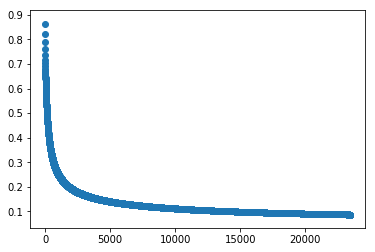

In [52]:
plt.scatter(iterations,neg_log_like_loss)

In [53]:
theta0_final

array([[-10.60070819]])

In [60]:
theta_final

array([[-0.23962582],
       [ 4.0608252 ],
       [-0.88661257],
       [ 1.38105328],
       [-1.22318147],
       [-0.05397729],
       [ 4.15359206],
       [ 5.55441433],
       [-2.03048749],
       [-4.88242463],
       [ 3.40415804],
       [ 0.20081543],
       [ 3.36437229],
       [ 2.92904165],
       [ 0.84955452],
       [-3.12832783],
       [-1.83445751],
       [-0.50068701],
       [-1.46223072],
       [-2.53827764],
       [ 4.16299096],
       [ 4.65276501],
       [ 3.39155973],
       [ 5.48902663],
       [ 1.60345826],
       [ 2.50218302],
       [ 2.29578148],
       [ 5.74969331],
       [ 1.35078378],
       [-1.35245354]])

In [55]:
#How will you perform testing in Logistic Regression

In [97]:
class_labels2 = testing_data['diagnosis']
C2 = np.array(class_labels2)

In [104]:
C2= C2.reshape(C2.shape[0],1)

(171, 1)

In [106]:
pure_testing_data = testing_data.drop(['diagnosis'],axis=1,inplace=False)

In [114]:
X1 = np.array(pure_testing_data)

In [115]:
X1 = X1/np.max(X1,axis=0)

In [121]:
theta_final

array([[-0.23962582],
       [ 4.0608252 ],
       [-0.88661257],
       [ 1.38105328],
       [-1.22318147],
       [-0.05397729],
       [ 4.15359206],
       [ 5.55441433],
       [-2.03048749],
       [-4.88242463],
       [ 3.40415804],
       [ 0.20081543],
       [ 3.36437229],
       [ 2.92904165],
       [ 0.84955452],
       [-3.12832783],
       [-1.83445751],
       [-0.50068701],
       [-1.46223072],
       [-2.53827764],
       [ 4.16299096],
       [ 4.65276501],
       [ 3.39155973],
       [ 5.48902663],
       [ 1.60345826],
       [ 2.50218302],
       [ 2.29578148],
       [ 5.74969331],
       [ 1.35078378],
       [-1.35245354]])